In [79]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from random import shuffle
from tqdm import tqdm
import glob
from PIL import Image

tf.enable_eager_execution()
print(tf.__version__)
print(keras.__version__)

1.13.1
2.2.4-tf


In [80]:
TRAIN_DIR = './cats_dogs/train/'
TEST_DIR = './cats_dogs/test/'

LR = 0.001

IM_WIDTH = 50
IM_HEIGHT = 50

In [81]:
for f in tqdm(os.listdir(TRAIN_DIR)):        # 파일명 가져오기
    print(f)

  0%|                                                                                         | 0/4000 [00:00<?, ?it/s]

cat.0.jpg
cat.1.jpg
cat.10.jpg
cat.100.jpg
cat.1000.jpg
cat.1001.jpg
cat.1002.jpg
cat.1003.jpg
cat.1004.jpg
cat.1005.jpg
cat.1006.jpg
cat.1007.jpg
cat.1008.jpg
cat.1009.jpg
cat.101.jpg
cat.1010.jpg
cat.1011.jpg
cat.1012.jpg
cat.1013.jpg
cat.1014.jpg
cat.1015.jpg
cat.1016.jpg
cat.1017.jpg
cat.1018.jpg
cat.1019.jpg
cat.102.jpg
cat.1020.jpg
cat.1021.jpg
cat.1022.jpg
cat.1023.jpg
cat.1024.jpg
cat.1025.jpg
cat.1026.jpg
cat.1027.jpg
cat.1028.jpg
cat.1029.jpg
cat.103.jpg
cat.1030.jpg
cat.1031.jpg
cat.1032.jpg
cat.1033.jpg
cat.1034.jpg
cat.1035.jpg
cat.1036.jpg
cat.1037.jpg
cat.1038.jpg
cat.1039.jpg
cat.104.jpg
cat.1040.jpg
cat.1041.jpg
cat.1042.jpg
cat.1043.jpg
cat.1044.jpg
cat.1045.jpg
cat.1046.jpg
cat.1047.jpg
cat.1048.jpg
cat.1049.jpg
cat.105.jpg


  1%|█▏                                                                             | 59/4000 [00:00<00:06, 579.99it/s]

cat.1050.jpg
cat.1051.jpg
cat.1052.jpg
cat.1053.jpg
cat.1054.jpg
cat.1055.jpg
cat.1056.jpg
cat.1057.jpg
cat.1058.jpg
cat.1059.jpg
cat.106.jpg
cat.1060.jpg
cat.1061.jpg
cat.1062.jpg
cat.1063.jpg
cat.1064.jpg
cat.1065.jpg
cat.1066.jpg
cat.1067.jpg
cat.1068.jpg
cat.1069.jpg
cat.107.jpg
cat.1070.jpg
cat.1071.jpg
cat.1072.jpg
cat.1073.jpg
cat.1074.jpg
cat.1075.jpg
cat.1076.jpg
cat.1077.jpg
cat.1078.jpg
cat.1079.jpg
cat.108.jpg
cat.1080.jpg
cat.1081.jpg
cat.1082.jpg
cat.1083.jpg
cat.1084.jpg
cat.1085.jpg
cat.1086.jpg
cat.1087.jpg
cat.1088.jpg
cat.1089.jpg
cat.109.jpg
cat.1090.jpg
cat.1091.jpg
cat.1092.jpg
cat.1093.jpg
cat.1094.jpg
cat.1095.jpg
cat.1096.jpg
cat.1097.jpg
cat.1098.jpg
cat.1099.jpg
cat.11.jpg
cat.110.jpg
cat.1100.jpg
cat.1101.jpg
cat.1102.jpg
cat.1103.jpg


  3%|██▎                                                                           | 119/4000 [00:00<00:06, 584.60it/s]

cat.1104.jpg
cat.1105.jpg
cat.1106.jpg
cat.1107.jpg
cat.1108.jpg
cat.1109.jpg
cat.111.jpg
cat.1110.jpg
cat.1111.jpg
cat.1112.jpg
cat.1113.jpg
cat.1114.jpg
cat.1115.jpg
cat.1116.jpg
cat.1117.jpg
cat.1118.jpg
cat.1119.jpg
cat.112.jpg
cat.1120.jpg
cat.1121.jpg
cat.1122.jpg
cat.1123.jpg
cat.1124.jpg
cat.1125.jpg
cat.1126.jpg
cat.1127.jpg
cat.1128.jpg
cat.1129.jpg
cat.113.jpg
cat.1130.jpg
cat.1131.jpg
cat.1132.jpg
cat.1133.jpg
cat.1134.jpg
cat.1135.jpg
cat.1136.jpg
cat.1137.jpg
cat.1138.jpg
cat.1139.jpg
cat.114.jpg
cat.1140.jpg
cat.1141.jpg
cat.1142.jpg
cat.1143.jpg
cat.1144.jpg
cat.1145.jpg
cat.1146.jpg
cat.1147.jpg
cat.1148.jpg
cat.1149.jpg
cat.115.jpg
cat.1150.jpg
cat.1151.jpg
cat.1152.jpg
cat.1153.jpg
cat.1154.jpg
cat.1155.jpg
cat.1156.jpg
cat.1157.jpg


  4%|███▍                                                                          | 178/4000 [00:00<00:06, 584.76it/s]

cat.1158.jpg
cat.1159.jpg
cat.116.jpg
cat.1160.jpg
cat.1161.jpg
cat.1162.jpg
cat.1163.jpg
cat.1164.jpg
cat.1165.jpg
cat.1166.jpg
cat.1167.jpg
cat.1168.jpg
cat.1169.jpg
cat.117.jpg
cat.1170.jpg
cat.1171.jpg
cat.1172.jpg
cat.1173.jpg
cat.1174.jpg
cat.1175.jpg
cat.1176.jpg
cat.1177.jpg
cat.1178.jpg
cat.1179.jpg
cat.118.jpg
cat.1180.jpg
cat.1181.jpg
cat.1182.jpg
cat.1183.jpg
cat.1184.jpg
cat.1185.jpg
cat.1186.jpg
cat.1187.jpg
cat.1188.jpg
cat.1189.jpg
cat.119.jpg
cat.1190.jpg
cat.1191.jpg
cat.1192.jpg
cat.1193.jpg
cat.1194.jpg
cat.1195.jpg
cat.1196.jpg
cat.1197.jpg
cat.1198.jpg
cat.1199.jpg
cat.12.jpg
cat.120.jpg
cat.1200.jpg
cat.1201.jpg
cat.1202.jpg
cat.1203.jpg
cat.1204.jpg
cat.1205.jpg
cat.1206.jpg
cat.1207.jpg
cat.1208.jpg
cat.1209.jpg
cat.121.jpg
cat.1210.jpg


  6%|████▋                                                                         | 238/4000 [00:00<00:06, 586.44it/s]

cat.1211.jpg
cat.1212.jpg
cat.1213.jpg
cat.1214.jpg
cat.1215.jpg
cat.1216.jpg
cat.1217.jpg
cat.1218.jpg
cat.1219.jpg
cat.122.jpg
cat.1220.jpg
cat.1221.jpg
cat.1222.jpg
cat.1223.jpg
cat.1224.jpg
cat.1225.jpg
cat.1226.jpg
cat.1227.jpg
cat.1228.jpg
cat.1229.jpg
cat.123.jpg
cat.1230.jpg
cat.1231.jpg
cat.1232.jpg
cat.1233.jpg
cat.1234.jpg
cat.1235.jpg
cat.1236.jpg
cat.1237.jpg
cat.1238.jpg
cat.1239.jpg
cat.124.jpg
cat.1240.jpg
cat.1241.jpg
cat.1242.jpg
cat.1243.jpg
cat.1244.jpg
cat.1245.jpg
cat.1246.jpg
cat.1247.jpg
cat.1248.jpg
cat.1249.jpg
cat.125.jpg
cat.1250.jpg
cat.1251.jpg
cat.1252.jpg
cat.1253.jpg
cat.1254.jpg
cat.1255.jpg
cat.1256.jpg
cat.1257.jpg


  7%|█████▋                                                                        | 289/4000 [00:00<00:06, 559.85it/s]

cat.1258.jpg
cat.1259.jpg
cat.126.jpg
cat.1260.jpg
cat.1261.jpg
cat.1262.jpg
cat.1263.jpg
cat.1264.jpg
cat.1265.jpg
cat.1266.jpg
cat.1267.jpg
cat.1268.jpg
cat.1269.jpg
cat.127.jpg
cat.1270.jpg
cat.1271.jpg
cat.1272.jpg
cat.1273.jpg
cat.1274.jpg
cat.1275.jpg
cat.1276.jpg
cat.1277.jpg
cat.1278.jpg
cat.1279.jpg
cat.128.jpg
cat.1280.jpg
cat.1281.jpg
cat.1282.jpg
cat.1283.jpg
cat.1284.jpg
cat.1285.jpg
cat.1286.jpg
cat.1287.jpg
cat.1288.jpg
cat.1289.jpg
cat.129.jpg
cat.1290.jpg
cat.1291.jpg
cat.1292.jpg
cat.1293.jpg
cat.1294.jpg
cat.1295.jpg
cat.1296.jpg
cat.1297.jpg
cat.1298.jpg
cat.1299.jpg
cat.13.jpg


  8%|██████▌                                                                       | 336/4000 [00:00<00:07, 517.68it/s]

cat.130.jpg
cat.1300.jpg
cat.1301.jpg
cat.1302.jpg
cat.1303.jpg
cat.1304.jpg
cat.1305.jpg
cat.1306.jpg
cat.1307.jpg
cat.1308.jpg
cat.1309.jpg
cat.131.jpg
cat.1310.jpg
cat.1311.jpg
cat.1312.jpg
cat.1313.jpg
cat.1314.jpg
cat.1315.jpg
cat.1316.jpg
cat.1317.jpg
cat.1318.jpg
cat.1319.jpg
cat.132.jpg
cat.1320.jpg
cat.1321.jpg
cat.1322.jpg
cat.1323.jpg
cat.1324.jpg
cat.1325.jpg
cat.1326.jpg
cat.1327.jpg
cat.1328.jpg
cat.1329.jpg
cat.133.jpg
cat.1330.jpg
cat.1331.jpg
cat.1332.jpg
cat.1333.jpg
cat.1334.jpg
cat.1335.jpg
cat.1336.jpg
cat.1337.jpg
cat.1338.jpg
cat.1339.jpg
cat.134.jpg
cat.1340.jpg


 10%|███████▍                                                                      | 382/4000 [00:00<00:07, 488.25it/s]

cat.1341.jpg
cat.1342.jpg
cat.1343.jpg
cat.1344.jpg
cat.1345.jpg
cat.1346.jpg
cat.1347.jpg
cat.1348.jpg
cat.1349.jpg
cat.135.jpg
cat.1350.jpg
cat.1351.jpg
cat.1352.jpg
cat.1353.jpg
cat.1354.jpg
cat.1355.jpg
cat.1356.jpg
cat.1357.jpg
cat.1358.jpg
cat.1359.jpg
cat.136.jpg
cat.1360.jpg
cat.1361.jpg
cat.1362.jpg
cat.1363.jpg
cat.1364.jpg
cat.1365.jpg
cat.1366.jpg
cat.1367.jpg
cat.1368.jpg
cat.1369.jpg
cat.137.jpg
cat.1370.jpg
cat.1371.jpg
cat.1372.jpg
cat.1373.jpg
cat.1374.jpg
cat.1375.jpg
cat.1376.jpg
cat.1377.jpg
cat.1378.jpg
cat.1379.jpg
cat.138.jpg
cat.1380.jpg
cat.1381.jpg
cat.1382.jpg
cat.1383.jpg
cat.1384.jpg
cat.1385.jpg
cat.1386.jpg
cat.1387.jpg
cat.1388.jpg
cat.1389.jpg
cat.139.jpg
cat.1390.jpg
cat.1391.jpg
cat.1392.jpg
cat.1393.jpg
cat.1394.jpg
cat.1395.jpg
cat.1396.jpg
cat.1397.jpg
cat.1398.jpg
cat.1399.jpg
cat.14.jpg
cat.140.jpg
cat.1400.jpg
cat.1401.jpg


 11%|████████▊                                                                     | 450/4000 [00:00<00:06, 532.49it/s]

cat.1402.jpg
cat.1403.jpg
cat.1404.jpg
cat.1405.jpg
cat.1406.jpg
cat.1407.jpg
cat.1408.jpg
cat.1409.jpg
cat.141.jpg
cat.1410.jpg
cat.1411.jpg
cat.1412.jpg
cat.1413.jpg
cat.1414.jpg
cat.1415.jpg
cat.1416.jpg
cat.1417.jpg
cat.1418.jpg
cat.1419.jpg
cat.142.jpg
cat.1420.jpg
cat.1421.jpg
cat.1422.jpg
cat.1423.jpg
cat.1424.jpg
cat.1425.jpg
cat.1426.jpg
cat.1427.jpg
cat.1428.jpg
cat.1429.jpg
cat.143.jpg
cat.1430.jpg
cat.1431.jpg
cat.1432.jpg
cat.1433.jpg
cat.1434.jpg
cat.1435.jpg
cat.1436.jpg
cat.1437.jpg
cat.1438.jpg
cat.1439.jpg
cat.144.jpg
cat.1440.jpg
cat.1441.jpg
cat.1442.jpg
cat.1443.jpg
cat.1444.jpg
cat.1445.jpg
cat.1446.jpg
cat.1447.jpg
cat.1448.jpg
cat.1449.jpg
cat.145.jpg
cat.1450.jpg
cat.1451.jpg
cat.1452.jpg
cat.1453.jpg


 13%|█████████▉                                                                    | 507/4000 [00:00<00:06, 542.08it/s]

cat.1454.jpg
cat.1455.jpg
cat.1456.jpg
cat.1457.jpg
cat.1458.jpg
cat.1459.jpg
cat.146.jpg
cat.1460.jpg
cat.1461.jpg
cat.1462.jpg
cat.1463.jpg
cat.1464.jpg
cat.1465.jpg
cat.1466.jpg
cat.1467.jpg
cat.1468.jpg
cat.1469.jpg
cat.147.jpg
cat.1470.jpg
cat.1471.jpg
cat.1472.jpg
cat.1473.jpg
cat.1474.jpg
cat.1475.jpg
cat.1476.jpg
cat.1477.jpg
cat.1478.jpg
cat.1479.jpg
cat.148.jpg
cat.1480.jpg
cat.1481.jpg
cat.1482.jpg
cat.1483.jpg
cat.1484.jpg
cat.1485.jpg
cat.1486.jpg
cat.1487.jpg
cat.1488.jpg
cat.1489.jpg
cat.149.jpg
cat.1490.jpg
cat.1491.jpg
cat.1492.jpg
cat.1493.jpg
cat.1494.jpg
cat.1495.jpg
cat.1496.jpg
cat.1497.jpg
cat.1498.jpg
cat.1499.jpg
cat.15.jpg
cat.150.jpg
cat.1500.jpg
cat.1501.jpg
cat.1502.jpg
cat.1503.jpg
cat.1504.jpg
cat.1505.jpg
cat.1506.jpg
cat.1507.jpg
cat.1508.jpg
cat.1509.jpg
cat.151.jpg
cat.1510.jpg
cat.1511.jpg
cat.1512.jpg
cat.1513.jpg
cat.1514.jpg
cat.1515.jpg
cat.1516.jpg


 14%|███████████▎                                                                  | 577/4000 [00:01<00:05, 580.38it/s]

cat.1517.jpg
cat.1518.jpg
cat.1519.jpg
cat.152.jpg
cat.1520.jpg
cat.1521.jpg
cat.1522.jpg
cat.1523.jpg
cat.1524.jpg
cat.1525.jpg
cat.1526.jpg
cat.1527.jpg
cat.1528.jpg
cat.1529.jpg
cat.153.jpg
cat.1530.jpg
cat.1531.jpg
cat.1532.jpg
cat.1533.jpg
cat.1534.jpg
cat.1535.jpg
cat.1536.jpg
cat.1537.jpg
cat.1538.jpg
cat.1539.jpg
cat.154.jpg
cat.1540.jpg
cat.1541.jpg
cat.1542.jpg
cat.1543.jpg
cat.1544.jpg
cat.1545.jpg
cat.1546.jpg
cat.1547.jpg
cat.1548.jpg
cat.1549.jpg
cat.155.jpg
cat.1550.jpg
cat.1551.jpg
cat.1552.jpg
cat.1553.jpg
cat.1554.jpg
cat.1555.jpg
cat.1556.jpg
cat.1557.jpg
cat.1558.jpg
cat.1559.jpg
cat.156.jpg
cat.1560.jpg
cat.1561.jpg
cat.1562.jpg
cat.1563.jpg
cat.1564.jpg
cat.1565.jpg
cat.1566.jpg
cat.1567.jpg
cat.1568.jpg
cat.1569.jpg
cat.157.jpg


 16%|████████████▍                                                                 | 636/4000 [00:01<00:06, 513.74it/s]

cat.1570.jpg
cat.1571.jpg
cat.1572.jpg
cat.1573.jpg
cat.1574.jpg
cat.1575.jpg
cat.1576.jpg
cat.1577.jpg
cat.1578.jpg
cat.1579.jpg
cat.158.jpg
cat.1580.jpg
cat.1581.jpg
cat.1582.jpg
cat.1583.jpg
cat.1584.jpg
cat.1585.jpg
cat.1586.jpg
cat.1587.jpg
cat.1588.jpg
cat.1589.jpg
cat.159.jpg
cat.1590.jpg
cat.1591.jpg
cat.1592.jpg
cat.1593.jpg
cat.1594.jpg
cat.1595.jpg
cat.1596.jpg
cat.1597.jpg
cat.1598.jpg
cat.1599.jpg
cat.16.jpg
cat.160.jpg
cat.1600.jpg
cat.1601.jpg
cat.1602.jpg
cat.1603.jpg
cat.1604.jpg
cat.1605.jpg
cat.1606.jpg
cat.1607.jpg
cat.1608.jpg
cat.1609.jpg
cat.161.jpg
cat.1610.jpg
cat.1611.jpg
cat.1612.jpg
cat.1613.jpg
cat.1614.jpg
cat.1615.jpg
cat.1616.jpg
cat.1617.jpg


 17%|█████████████▍                                                                | 689/4000 [00:01<00:06, 498.17it/s]

cat.1618.jpg
cat.1619.jpg
cat.162.jpg
cat.1620.jpg
cat.1621.jpg
cat.1622.jpg
cat.1623.jpg
cat.1624.jpg
cat.1625.jpg
cat.1626.jpg
cat.1627.jpg
cat.1628.jpg
cat.1629.jpg
cat.163.jpg
cat.1630.jpg
cat.1631.jpg
cat.1632.jpg
cat.1633.jpg
cat.1634.jpg
cat.1635.jpg
cat.1636.jpg
cat.1637.jpg
cat.1638.jpg
cat.1639.jpg
cat.164.jpg
cat.1640.jpg
cat.1641.jpg
cat.1642.jpg
cat.1643.jpg
cat.1644.jpg
cat.1645.jpg
cat.1646.jpg
cat.1647.jpg
cat.1648.jpg
cat.1649.jpg
cat.165.jpg
cat.1650.jpg
cat.1651.jpg
cat.1652.jpg
cat.1653.jpg
cat.1654.jpg
cat.1655.jpg
cat.1656.jpg
cat.1657.jpg
cat.1658.jpg
cat.1659.jpg
cat.166.jpg
cat.1660.jpg
cat.1661.jpg
cat.1662.jpg
cat.1663.jpg
cat.1664.jpg


 19%|██████████████▍                                                               | 741/4000 [00:01<00:06, 502.00it/s]

cat.1665.jpg
cat.1666.jpg
cat.1667.jpg
cat.1668.jpg
cat.1669.jpg
cat.167.jpg
cat.1670.jpg
cat.1671.jpg
cat.1672.jpg
cat.1673.jpg
cat.1674.jpg
cat.1675.jpg
cat.1676.jpg
cat.1677.jpg
cat.1678.jpg
cat.1679.jpg
cat.168.jpg
cat.1680.jpg
cat.1681.jpg
cat.1682.jpg
cat.1683.jpg
cat.1684.jpg
cat.1685.jpg
cat.1686.jpg
cat.1687.jpg
cat.1688.jpg
cat.1689.jpg
cat.169.jpg
cat.1690.jpg
cat.1691.jpg
cat.1692.jpg
cat.1693.jpg
cat.1694.jpg
cat.1695.jpg
cat.1696.jpg
cat.1697.jpg
cat.1698.jpg
cat.1699.jpg
cat.17.jpg
cat.170.jpg
cat.1700.jpg
cat.1701.jpg
cat.1702.jpg
cat.1703.jpg
cat.1704.jpg
cat.1705.jpg
cat.1706.jpg
cat.1707.jpg
cat.1708.jpg
cat.1709.jpg
cat.171.jpg


 20%|███████████████▍                                                              | 792/4000 [00:01<00:06, 493.50it/s]

cat.1710.jpg
cat.1711.jpg
cat.1712.jpg
cat.1713.jpg
cat.1714.jpg
cat.1715.jpg
cat.1716.jpg
cat.1717.jpg
cat.1718.jpg
cat.1719.jpg
cat.172.jpg
cat.1720.jpg
cat.1721.jpg
cat.1722.jpg
cat.1723.jpg
cat.1724.jpg
cat.1725.jpg
cat.1726.jpg
cat.1727.jpg
cat.1728.jpg
cat.1729.jpg
cat.173.jpg
cat.1730.jpg
cat.1731.jpg
cat.1732.jpg
cat.1733.jpg
cat.1734.jpg
cat.1735.jpg
cat.1736.jpg
cat.1737.jpg
cat.1738.jpg
cat.1739.jpg
cat.174.jpg
cat.1740.jpg
cat.1741.jpg
cat.1742.jpg
cat.1743.jpg
cat.1744.jpg
cat.1745.jpg
cat.1746.jpg
cat.1747.jpg
cat.1748.jpg
cat.1749.jpg
cat.175.jpg
cat.1750.jpg
cat.1751.jpg
cat.1752.jpg
cat.1753.jpg
cat.1754.jpg
cat.1755.jpg
cat.1756.jpg
cat.1757.jpg
cat.1758.jpg
cat.1759.jpg
cat.176.jpg
cat.1760.jpg
cat.1761.jpg
cat.1762.jpg
cat.1763.jpg
cat.1764.jpg
cat.1765.jpg
cat.1766.jpg
cat.1767.jpg
cat.1768.jpg
cat.1769.jpg
cat.177.jpg
cat.1770.jpg
cat.1771.jpg
cat.1772.jpg
cat.1773.jpg
cat.1774.jpg
cat.1775.jpg
cat.1776.jpg
cat.1777.jpg
cat.1778.jpg
cat.1779.jpg


 22%|████████████████▉                                                             | 868/4000 [00:01<00:05, 551.49it/s]

cat.178.jpg
cat.1780.jpg
cat.1781.jpg
cat.1782.jpg
cat.1783.jpg
cat.1784.jpg
cat.1785.jpg
cat.1786.jpg
cat.1787.jpg
cat.1788.jpg
cat.1789.jpg
cat.179.jpg
cat.1790.jpg
cat.1791.jpg
cat.1792.jpg
cat.1793.jpg
cat.1794.jpg
cat.1795.jpg
cat.1796.jpg
cat.1797.jpg
cat.1798.jpg
cat.1799.jpg
cat.18.jpg
cat.180.jpg
cat.1800.jpg
cat.1801.jpg
cat.1802.jpg
cat.1803.jpg
cat.1804.jpg
cat.1805.jpg
cat.1806.jpg
cat.1807.jpg
cat.1808.jpg
cat.1809.jpg
cat.181.jpg
cat.1810.jpg
cat.1811.jpg
cat.1812.jpg
cat.1813.jpg
cat.1814.jpg
cat.1815.jpg
cat.1816.jpg
cat.1817.jpg
cat.1818.jpg
cat.1819.jpg
cat.182.jpg
cat.1820.jpg
cat.1821.jpg
cat.1822.jpg
cat.1823.jpg
cat.1824.jpg
cat.1825.jpg
cat.1826.jpg
cat.1827.jpg
cat.1828.jpg
cat.1829.jpg
cat.183.jpg
cat.1830.jpg
cat.1831.jpg


 23%|██████████████████                                                            | 927/4000 [00:01<00:05, 561.80it/s]

cat.1832.jpg
cat.1833.jpg
cat.1834.jpg
cat.1835.jpg
cat.1836.jpg
cat.1837.jpg
cat.1838.jpg
cat.1839.jpg
cat.184.jpg
cat.1840.jpg
cat.1841.jpg
cat.1842.jpg
cat.1843.jpg
cat.1844.jpg
cat.1845.jpg
cat.1846.jpg
cat.1847.jpg
cat.1848.jpg
cat.1849.jpg
cat.185.jpg
cat.1850.jpg
cat.1851.jpg
cat.1852.jpg
cat.1853.jpg
cat.1854.jpg
cat.1855.jpg
cat.1856.jpg
cat.1857.jpg
cat.1858.jpg
cat.1859.jpg
cat.186.jpg
cat.1860.jpg
cat.1861.jpg
cat.1862.jpg
cat.1863.jpg
cat.1864.jpg
cat.1865.jpg
cat.1866.jpg
cat.1867.jpg
cat.1868.jpg
cat.1869.jpg
cat.187.jpg
cat.1870.jpg
cat.1871.jpg
cat.1872.jpg
cat.1873.jpg
cat.1874.jpg
cat.1875.jpg
cat.1876.jpg
cat.1877.jpg
cat.1878.jpg
cat.1879.jpg
cat.188.jpg
cat.1880.jpg
cat.1881.jpg
cat.1882.jpg
cat.1883.jpg
cat.1884.jpg
cat.1885.jpg
cat.1886.jpg
cat.1887.jpg
cat.1888.jpg
cat.1889.jpg
cat.189.jpg
cat.1890.jpg
cat.1891.jpg
cat.1892.jpg
cat.1893.jpg
cat.1894.jpg


 25%|███████████████████▍                                                          | 996/4000 [00:01<00:05, 594.92it/s]

cat.1895.jpg
cat.1896.jpg
cat.1897.jpg
cat.1898.jpg
cat.1899.jpg
cat.19.jpg
cat.190.jpg
cat.1900.jpg
cat.1901.jpg
cat.1902.jpg
cat.1903.jpg
cat.1904.jpg
cat.1905.jpg
cat.1906.jpg
cat.1907.jpg
cat.1908.jpg
cat.1909.jpg
cat.191.jpg
cat.1910.jpg
cat.1911.jpg
cat.1912.jpg
cat.1913.jpg
cat.1914.jpg
cat.1915.jpg
cat.1916.jpg
cat.1917.jpg
cat.1918.jpg
cat.1919.jpg
cat.192.jpg
cat.1920.jpg
cat.1921.jpg
cat.1922.jpg
cat.1923.jpg
cat.1924.jpg
cat.1925.jpg
cat.1926.jpg
cat.1927.jpg
cat.1928.jpg
cat.1929.jpg
cat.193.jpg
cat.1930.jpg
cat.1931.jpg
cat.1932.jpg
cat.1933.jpg
cat.1934.jpg
cat.1935.jpg
cat.1936.jpg
cat.1937.jpg
cat.1938.jpg
cat.1939.jpg
cat.194.jpg
cat.1940.jpg
cat.1941.jpg
cat.1942.jpg
cat.1943.jpg
cat.1944.jpg
cat.1945.jpg
cat.1946.jpg
cat.1947.jpg
cat.1948.jpg
cat.1949.jpg
cat.195.jpg
cat.1950.jpg
cat.1951.jpg
cat.1952.jpg
cat.1953.jpg
cat.1954.jpg
cat.1955.jpg
cat.1956.jpg
cat.1957.jpg
cat.1958.jpg


 27%|████████████████████▌                                                        | 1067/4000 [00:01<00:04, 624.13it/s]

cat.1959.jpg
cat.196.jpg
cat.1960.jpg
cat.1961.jpg
cat.1962.jpg
cat.1963.jpg
cat.1964.jpg
cat.1965.jpg
cat.1966.jpg
cat.1967.jpg
cat.1968.jpg
cat.1969.jpg
cat.197.jpg
cat.1970.jpg
cat.1971.jpg
cat.1972.jpg
cat.1973.jpg
cat.1974.jpg
cat.1975.jpg
cat.1976.jpg
cat.1977.jpg
cat.1978.jpg
cat.1979.jpg
cat.198.jpg
cat.1980.jpg
cat.1981.jpg
cat.1982.jpg
cat.1983.jpg
cat.1984.jpg
cat.1985.jpg
cat.1986.jpg
cat.1987.jpg
cat.1988.jpg
cat.1989.jpg
cat.199.jpg
cat.1990.jpg
cat.1991.jpg
cat.1992.jpg
cat.1993.jpg
cat.1994.jpg
cat.1995.jpg
cat.1996.jpg
cat.1997.jpg
cat.1998.jpg
cat.1999.jpg
cat.2.jpg
cat.20.jpg
cat.200.jpg
cat.201.jpg
cat.202.jpg
cat.203.jpg
cat.204.jpg
cat.205.jpg
cat.206.jpg
cat.207.jpg
cat.208.jpg
cat.209.jpg
cat.21.jpg
cat.210.jpg
cat.211.jpg
cat.212.jpg
cat.213.jpg
cat.214.jpg
cat.215.jpg
cat.216.jpg


 28%|█████████████████████▊                                                       | 1132/4000 [00:02<00:04, 605.72it/s]

cat.217.jpg
cat.218.jpg
cat.219.jpg
cat.22.jpg
cat.220.jpg
cat.221.jpg
cat.222.jpg
cat.223.jpg
cat.224.jpg
cat.225.jpg
cat.226.jpg
cat.227.jpg
cat.228.jpg
cat.229.jpg
cat.23.jpg
cat.230.jpg
cat.231.jpg
cat.232.jpg
cat.233.jpg
cat.234.jpg
cat.235.jpg
cat.236.jpg
cat.237.jpg
cat.238.jpg
cat.239.jpg
cat.24.jpg
cat.240.jpg
cat.241.jpg
cat.242.jpg
cat.243.jpg
cat.244.jpg
cat.245.jpg
cat.246.jpg
cat.247.jpg
cat.248.jpg
cat.249.jpg
cat.25.jpg
cat.250.jpg
cat.251.jpg
cat.252.jpg
cat.253.jpg
cat.254.jpg
cat.255.jpg
cat.256.jpg
cat.257.jpg
cat.258.jpg
cat.259.jpg
cat.26.jpg
cat.260.jpg
cat.261.jpg
cat.262.jpg
cat.263.jpg
cat.264.jpg
cat.265.jpg
cat.266.jpg
cat.267.jpg
cat.268.jpg
cat.269.jpg
cat.27.jpg
cat.270.jpg
cat.271.jpg
cat.272.jpg


 30%|██████████████████████▉                                                      | 1194/4000 [00:02<00:04, 582.20it/s]

cat.273.jpg
cat.274.jpg
cat.275.jpg
cat.276.jpg
cat.277.jpg
cat.278.jpg
cat.279.jpg
cat.28.jpg
cat.280.jpg
cat.281.jpg
cat.282.jpg
cat.283.jpg
cat.284.jpg
cat.285.jpg
cat.286.jpg
cat.287.jpg
cat.288.jpg
cat.289.jpg
cat.29.jpg
cat.290.jpg
cat.291.jpg
cat.292.jpg
cat.293.jpg
cat.294.jpg
cat.295.jpg
cat.296.jpg
cat.297.jpg
cat.298.jpg
cat.299.jpg
cat.3.jpg
cat.30.jpg
cat.300.jpg
cat.301.jpg
cat.302.jpg
cat.303.jpg
cat.304.jpg
cat.305.jpg
cat.306.jpg
cat.307.jpg
cat.308.jpg
cat.309.jpg
cat.31.jpg
cat.310.jpg
cat.311.jpg
cat.312.jpg
cat.313.jpg
cat.314.jpg
cat.315.jpg
cat.316.jpg
cat.317.jpg
cat.318.jpg
cat.319.jpg
cat.32.jpg
cat.320.jpg
cat.321.jpg
cat.322.jpg
cat.323.jpg
cat.324.jpg
cat.325.jpg
cat.326.jpg


 31%|████████████████████████▏                                                    | 1254/4000 [00:02<00:04, 571.88it/s]

cat.327.jpg
cat.328.jpg
cat.329.jpg
cat.33.jpg
cat.330.jpg
cat.331.jpg
cat.332.jpg
cat.333.jpg
cat.334.jpg
cat.335.jpg
cat.336.jpg
cat.337.jpg
cat.338.jpg
cat.339.jpg
cat.34.jpg
cat.340.jpg
cat.341.jpg
cat.342.jpg
cat.343.jpg
cat.344.jpg
cat.345.jpg
cat.346.jpg
cat.347.jpg
cat.348.jpg
cat.349.jpg
cat.35.jpg
cat.350.jpg
cat.351.jpg
cat.352.jpg
cat.353.jpg
cat.354.jpg
cat.355.jpg
cat.356.jpg
cat.357.jpg
cat.358.jpg
cat.359.jpg
cat.36.jpg
cat.360.jpg
cat.361.jpg
cat.362.jpg
cat.363.jpg
cat.364.jpg
cat.365.jpg
cat.366.jpg
cat.367.jpg
cat.368.jpg
cat.369.jpg
cat.37.jpg
cat.370.jpg
cat.371.jpg
cat.372.jpg
cat.373.jpg
cat.374.jpg
cat.375.jpg
cat.376.jpg
cat.377.jpg
cat.378.jpg
cat.379.jpg


 33%|█████████████████████████▎                                                   | 1312/4000 [00:02<00:04, 543.87it/s]

cat.38.jpg
cat.380.jpg
cat.381.jpg
cat.382.jpg
cat.383.jpg
cat.384.jpg
cat.385.jpg
cat.386.jpg
cat.387.jpg
cat.388.jpg
cat.389.jpg
cat.39.jpg
cat.390.jpg
cat.391.jpg
cat.392.jpg
cat.393.jpg
cat.394.jpg
cat.395.jpg
cat.396.jpg
cat.397.jpg
cat.398.jpg
cat.399.jpg
cat.4.jpg
cat.40.jpg
cat.400.jpg
cat.401.jpg
cat.402.jpg
cat.403.jpg
cat.404.jpg
cat.405.jpg
cat.406.jpg
cat.407.jpg
cat.408.jpg
cat.409.jpg
cat.41.jpg
cat.410.jpg
cat.411.jpg
cat.412.jpg
cat.413.jpg
cat.414.jpg
cat.415.jpg
cat.416.jpg
cat.417.jpg
cat.418.jpg
cat.419.jpg
cat.42.jpg
cat.420.jpg
cat.421.jpg
cat.422.jpg
cat.423.jpg
cat.424.jpg
cat.425.jpg
cat.426.jpg
cat.427.jpg
cat.428.jpg
cat.429.jpg


 34%|██████████████████████████▎                                                  | 1368/4000 [00:02<00:04, 544.49it/s]

cat.43.jpg
cat.430.jpg
cat.431.jpg
cat.432.jpg
cat.433.jpg
cat.434.jpg
cat.435.jpg
cat.436.jpg
cat.437.jpg
cat.438.jpg
cat.439.jpg
cat.44.jpg
cat.440.jpg
cat.441.jpg
cat.442.jpg
cat.443.jpg
cat.444.jpg
cat.445.jpg
cat.446.jpg
cat.447.jpg
cat.448.jpg
cat.449.jpg
cat.45.jpg
cat.450.jpg
cat.451.jpg
cat.452.jpg
cat.453.jpg
cat.454.jpg
cat.455.jpg
cat.456.jpg
cat.457.jpg
cat.458.jpg
cat.459.jpg
cat.46.jpg
cat.460.jpg
cat.461.jpg
cat.462.jpg
cat.463.jpg
cat.464.jpg
cat.465.jpg
cat.466.jpg
cat.467.jpg
cat.468.jpg
cat.469.jpg
cat.47.jpg
cat.470.jpg
cat.471.jpg
cat.472.jpg
cat.473.jpg
cat.474.jpg
cat.475.jpg
cat.476.jpg
cat.477.jpg
cat.478.jpg
cat.479.jpg
cat.48.jpg


 36%|███████████████████████████▍                                                 | 1424/4000 [00:02<00:04, 530.79it/s]

cat.480.jpg
cat.481.jpg
cat.482.jpg
cat.483.jpg
cat.484.jpg
cat.485.jpg
cat.486.jpg
cat.487.jpg
cat.488.jpg
cat.489.jpg
cat.49.jpg
cat.490.jpg
cat.491.jpg
cat.492.jpg
cat.493.jpg
cat.494.jpg
cat.495.jpg
cat.496.jpg
cat.497.jpg
cat.498.jpg
cat.499.jpg
cat.5.jpg
cat.50.jpg
cat.500.jpg
cat.501.jpg
cat.502.jpg
cat.503.jpg
cat.504.jpg
cat.505.jpg
cat.506.jpg
cat.507.jpg
cat.508.jpg
cat.509.jpg
cat.51.jpg
cat.510.jpg
cat.511.jpg
cat.512.jpg
cat.513.jpg
cat.514.jpg
cat.515.jpg
cat.516.jpg
cat.517.jpg
cat.518.jpg
cat.519.jpg
cat.52.jpg
cat.520.jpg
cat.521.jpg
cat.522.jpg
cat.523.jpg
cat.524.jpg
cat.525.jpg
cat.526.jpg
cat.527.jpg
cat.528.jpg
cat.529.jpg
cat.53.jpg
cat.530.jpg
cat.531.jpg


 37%|████████████████████████████▌                                                | 1482/4000 [00:02<00:04, 540.50it/s]

cat.532.jpg
cat.533.jpg
cat.534.jpg
cat.535.jpg
cat.536.jpg
cat.537.jpg
cat.538.jpg
cat.539.jpg
cat.54.jpg
cat.540.jpg
cat.541.jpg
cat.542.jpg
cat.543.jpg
cat.544.jpg
cat.545.jpg
cat.546.jpg
cat.547.jpg
cat.548.jpg
cat.549.jpg
cat.55.jpg
cat.550.jpg
cat.551.jpg
cat.552.jpg
cat.553.jpg
cat.554.jpg
cat.555.jpg
cat.556.jpg
cat.557.jpg
cat.558.jpg
cat.559.jpg
cat.56.jpg
cat.560.jpg
cat.561.jpg
cat.562.jpg
cat.563.jpg
cat.564.jpg
cat.565.jpg
cat.566.jpg
cat.567.jpg
cat.568.jpg
cat.569.jpg
cat.57.jpg
cat.570.jpg
cat.571.jpg
cat.572.jpg
cat.573.jpg
cat.574.jpg
cat.575.jpg
cat.576.jpg
cat.577.jpg
cat.578.jpg
cat.579.jpg
cat.58.jpg
cat.580.jpg
cat.581.jpg
cat.582.jpg
cat.583.jpg
cat.584.jpg
cat.585.jpg
cat.586.jpg
cat.587.jpg
cat.588.jpg
cat.589.jpg
cat.59.jpg
cat.590.jpg
cat.591.jpg
cat.592.jpg
cat.593.jpg
cat.594.jpg
cat.595.jpg
cat.596.jpg
cat.597.jpg
cat.598.jpg
cat.599.jpg
cat.6.jpg
cat.60.jpg


 39%|█████████████████████████████▉                                               | 1558/4000 [00:02<00:04, 590.76it/s]

cat.600.jpg
cat.601.jpg
cat.602.jpg
cat.603.jpg
cat.604.jpg
cat.605.jpg
cat.606.jpg
cat.607.jpg
cat.608.jpg
cat.609.jpg
cat.61.jpg
cat.610.jpg
cat.611.jpg
cat.612.jpg
cat.613.jpg
cat.614.jpg
cat.615.jpg
cat.616.jpg
cat.617.jpg
cat.618.jpg
cat.619.jpg
cat.62.jpg
cat.620.jpg
cat.621.jpg
cat.622.jpg
cat.623.jpg
cat.624.jpg
cat.625.jpg
cat.626.jpg
cat.627.jpg
cat.628.jpg
cat.629.jpg
cat.63.jpg
cat.630.jpg
cat.631.jpg
cat.632.jpg
cat.633.jpg
cat.634.jpg
cat.635.jpg
cat.636.jpg
cat.637.jpg
cat.638.jpg
cat.639.jpg
cat.64.jpg
cat.640.jpg
cat.641.jpg
cat.642.jpg
cat.643.jpg
cat.644.jpg
cat.645.jpg
cat.646.jpg
cat.647.jpg
cat.648.jpg
cat.649.jpg
cat.65.jpg
cat.650.jpg
cat.651.jpg
cat.652.jpg
cat.653.jpg
cat.654.jpg
cat.655.jpg
cat.656.jpg
cat.657.jpg
cat.658.jpg
cat.659.jpg


 41%|███████████████████████████████▏                                             | 1623/4000 [00:02<00:03, 604.44it/s]

cat.66.jpg
cat.660.jpg
cat.661.jpg
cat.662.jpg
cat.663.jpg
cat.664.jpg
cat.665.jpg
cat.666.jpg
cat.667.jpg
cat.668.jpg
cat.669.jpg
cat.67.jpg
cat.670.jpg
cat.671.jpg
cat.672.jpg
cat.673.jpg
cat.674.jpg
cat.675.jpg
cat.676.jpg
cat.677.jpg
cat.678.jpg
cat.679.jpg
cat.68.jpg
cat.680.jpg
cat.681.jpg
cat.682.jpg
cat.683.jpg
cat.684.jpg
cat.685.jpg
cat.686.jpg
cat.687.jpg
cat.688.jpg
cat.689.jpg
cat.69.jpg
cat.690.jpg
cat.691.jpg
cat.692.jpg
cat.693.jpg
cat.694.jpg
cat.695.jpg
cat.696.jpg
cat.697.jpg
cat.698.jpg
cat.699.jpg
cat.7.jpg
cat.70.jpg
cat.700.jpg
cat.701.jpg
cat.702.jpg
cat.703.jpg
cat.704.jpg
cat.705.jpg
cat.706.jpg
cat.707.jpg
cat.708.jpg
cat.709.jpg
cat.71.jpg
cat.710.jpg
cat.711.jpg
cat.712.jpg
cat.713.jpg
cat.714.jpg
cat.715.jpg
cat.716.jpg
cat.717.jpg
cat.718.jpg
cat.719.jpg
cat.72.jpg
cat.720.jpg


 42%|████████████████████████████████▌                                            | 1692/4000 [00:02<00:03, 626.09it/s]

cat.721.jpg
cat.722.jpg
cat.723.jpg
cat.724.jpg
cat.725.jpg
cat.726.jpg
cat.727.jpg
cat.728.jpg
cat.729.jpg
cat.73.jpg
cat.730.jpg
cat.731.jpg
cat.732.jpg
cat.733.jpg
cat.734.jpg
cat.735.jpg
cat.736.jpg
cat.737.jpg
cat.738.jpg
cat.739.jpg
cat.74.jpg
cat.740.jpg
cat.741.jpg
cat.742.jpg
cat.743.jpg
cat.744.jpg
cat.745.jpg
cat.746.jpg
cat.747.jpg
cat.748.jpg
cat.749.jpg
cat.75.jpg
cat.750.jpg
cat.751.jpg
cat.752.jpg
cat.753.jpg
cat.754.jpg
cat.755.jpg
cat.756.jpg
cat.757.jpg
cat.758.jpg
cat.759.jpg
cat.76.jpg
cat.760.jpg
cat.761.jpg
cat.762.jpg
cat.763.jpg
cat.764.jpg
cat.765.jpg
cat.766.jpg
cat.767.jpg
cat.768.jpg
cat.769.jpg
cat.77.jpg
cat.770.jpg
cat.771.jpg
cat.772.jpg
cat.773.jpg
cat.774.jpg
cat.775.jpg
cat.776.jpg
cat.777.jpg
cat.778.jpg
cat.779.jpg
cat.78.jpg
cat.780.jpg
cat.781.jpg
cat.782.jpg


 44%|█████████████████████████████████▉                                           | 1760/4000 [00:03<00:03, 640.50it/s]

cat.783.jpg
cat.784.jpg
cat.785.jpg
cat.786.jpg
cat.787.jpg
cat.788.jpg
cat.789.jpg
cat.79.jpg
cat.790.jpg
cat.791.jpg
cat.792.jpg
cat.793.jpg
cat.794.jpg
cat.795.jpg
cat.796.jpg
cat.797.jpg
cat.798.jpg
cat.799.jpg
cat.8.jpg
cat.80.jpg
cat.800.jpg
cat.801.jpg
cat.802.jpg
cat.803.jpg
cat.804.jpg
cat.805.jpg
cat.806.jpg
cat.807.jpg
cat.808.jpg
cat.809.jpg
cat.81.jpg
cat.810.jpg
cat.811.jpg
cat.812.jpg
cat.813.jpg
cat.814.jpg
cat.815.jpg
cat.816.jpg
cat.817.jpg
cat.818.jpg
cat.819.jpg
cat.82.jpg
cat.820.jpg
cat.821.jpg
cat.822.jpg
cat.823.jpg
cat.824.jpg
cat.825.jpg
cat.826.jpg
cat.827.jpg
cat.828.jpg
cat.829.jpg
cat.83.jpg
cat.830.jpg
cat.831.jpg
cat.832.jpg
cat.833.jpg
cat.834.jpg
cat.835.jpg
cat.836.jpg
cat.837.jpg
cat.838.jpg
cat.839.jpg
cat.84.jpg
cat.840.jpg


 46%|███████████████████████████████████▏                                         | 1825/4000 [00:03<00:03, 625.31it/s]

cat.841.jpg
cat.842.jpg
cat.843.jpg
cat.844.jpg
cat.845.jpg
cat.846.jpg
cat.847.jpg
cat.848.jpg
cat.849.jpg
cat.85.jpg
cat.850.jpg
cat.851.jpg
cat.852.jpg
cat.853.jpg
cat.854.jpg
cat.855.jpg
cat.856.jpg
cat.857.jpg
cat.858.jpg
cat.859.jpg
cat.86.jpg
cat.860.jpg
cat.861.jpg
cat.862.jpg
cat.863.jpg
cat.864.jpg
cat.865.jpg
cat.866.jpg
cat.867.jpg
cat.868.jpg
cat.869.jpg
cat.87.jpg
cat.870.jpg
cat.871.jpg
cat.872.jpg
cat.873.jpg
cat.874.jpg
cat.875.jpg
cat.876.jpg
cat.877.jpg
cat.878.jpg
cat.879.jpg
cat.88.jpg
cat.880.jpg
cat.881.jpg
cat.882.jpg
cat.883.jpg
cat.884.jpg
cat.885.jpg
cat.886.jpg
cat.887.jpg
cat.888.jpg
cat.889.jpg
cat.89.jpg
cat.890.jpg
cat.891.jpg
cat.892.jpg
cat.893.jpg
cat.894.jpg
cat.895.jpg
cat.896.jpg
cat.897.jpg
cat.898.jpg
cat.899.jpg


 47%|████████████████████████████████████▎                                        | 1889/4000 [00:03<00:03, 585.31it/s]

cat.9.jpg
cat.90.jpg
cat.900.jpg
cat.901.jpg
cat.902.jpg
cat.903.jpg
cat.904.jpg
cat.905.jpg
cat.906.jpg
cat.907.jpg
cat.908.jpg
cat.909.jpg
cat.91.jpg
cat.910.jpg
cat.911.jpg
cat.912.jpg
cat.913.jpg
cat.914.jpg
cat.915.jpg
cat.916.jpg
cat.917.jpg
cat.918.jpg
cat.919.jpg
cat.92.jpg
cat.920.jpg
cat.921.jpg
cat.922.jpg
cat.923.jpg
cat.924.jpg
cat.925.jpg
cat.926.jpg
cat.927.jpg
cat.928.jpg
cat.929.jpg
cat.93.jpg
cat.930.jpg
cat.931.jpg
cat.932.jpg
cat.933.jpg
cat.934.jpg
cat.935.jpg
cat.936.jpg
cat.937.jpg
cat.938.jpg
cat.939.jpg
cat.94.jpg
cat.940.jpg
cat.941.jpg
cat.942.jpg
cat.943.jpg
cat.944.jpg
cat.945.jpg
cat.946.jpg
cat.947.jpg
cat.948.jpg
cat.949.jpg
cat.95.jpg
cat.950.jpg
cat.951.jpg
cat.952.jpg


 49%|█████████████████████████████████████▌                                       | 1949/4000 [00:03<00:03, 583.24it/s]

cat.953.jpg
cat.954.jpg
cat.955.jpg
cat.956.jpg
cat.957.jpg
cat.958.jpg
cat.959.jpg
cat.96.jpg
cat.960.jpg
cat.961.jpg
cat.962.jpg
cat.963.jpg
cat.964.jpg
cat.965.jpg
cat.966.jpg
cat.967.jpg
cat.968.jpg
cat.969.jpg
cat.97.jpg
cat.970.jpg
cat.971.jpg
cat.972.jpg
cat.973.jpg
cat.974.jpg
cat.975.jpg
cat.976.jpg
cat.977.jpg
cat.978.jpg
cat.979.jpg
cat.98.jpg
cat.980.jpg
cat.981.jpg
cat.982.jpg
cat.983.jpg
cat.984.jpg
cat.985.jpg
cat.986.jpg
cat.987.jpg
cat.988.jpg
cat.989.jpg
cat.99.jpg
cat.990.jpg
cat.991.jpg
cat.992.jpg
cat.993.jpg
cat.994.jpg
cat.995.jpg
cat.996.jpg
cat.997.jpg
cat.998.jpg
cat.999.jpg
dog.0.jpg
dog.1.jpg
dog.10.jpg
dog.100.jpg
dog.1000.jpg
dog.1001.jpg
dog.1002.jpg
dog.1003.jpg
dog.1004.jpg
dog.1005.jpg
dog.1006.jpg
dog.1007.jpg
dog.1008.jpg
dog.1009.jpg
dog.101.jpg
dog.1010.jpg
dog.1011.jpg
dog.1012.jpg
dog.1013.jpg
dog.1014.jpg


 50%|██████████████████████████████████████▉                                      | 2020/4000 [00:03<00:03, 614.80it/s]

dog.1015.jpg
dog.1016.jpg
dog.1017.jpg
dog.1018.jpg
dog.1019.jpg
dog.102.jpg
dog.1020.jpg
dog.1021.jpg
dog.1022.jpg
dog.1023.jpg
dog.1024.jpg
dog.1025.jpg
dog.1026.jpg
dog.1027.jpg
dog.1028.jpg
dog.1029.jpg
dog.103.jpg
dog.1030.jpg
dog.1031.jpg
dog.1032.jpg
dog.1033.jpg
dog.1034.jpg
dog.1035.jpg
dog.1036.jpg
dog.1037.jpg
dog.1038.jpg
dog.1039.jpg
dog.104.jpg
dog.1040.jpg
dog.1041.jpg
dog.1042.jpg
dog.1043.jpg
dog.1044.jpg
dog.1045.jpg
dog.1046.jpg
dog.1047.jpg
dog.1048.jpg
dog.1049.jpg
dog.105.jpg
dog.1050.jpg
dog.1051.jpg
dog.1052.jpg
dog.1053.jpg
dog.1054.jpg
dog.1055.jpg
dog.1056.jpg
dog.1057.jpg
dog.1058.jpg
dog.1059.jpg
dog.106.jpg
dog.1060.jpg
dog.1061.jpg
dog.1062.jpg
dog.1063.jpg
dog.1064.jpg
dog.1065.jpg
dog.1066.jpg
dog.1067.jpg
dog.1068.jpg
dog.1069.jpg
dog.107.jpg
dog.1070.jpg
dog.1071.jpg
dog.1072.jpg
dog.1073.jpg
dog.1074.jpg


 52%|████████████████████████████████████████▏                                    | 2086/4000 [00:03<00:03, 624.92it/s]

dog.1075.jpg
dog.1076.jpg
dog.1077.jpg
dog.1078.jpg
dog.1079.jpg
dog.108.jpg
dog.1080.jpg
dog.1081.jpg
dog.1082.jpg
dog.1083.jpg
dog.1084.jpg
dog.1085.jpg
dog.1086.jpg
dog.1087.jpg
dog.1088.jpg
dog.1089.jpg
dog.109.jpg
dog.1090.jpg
dog.1091.jpg
dog.1092.jpg
dog.1093.jpg
dog.1094.jpg
dog.1095.jpg
dog.1096.jpg
dog.1097.jpg
dog.1098.jpg
dog.1099.jpg
dog.11.jpg
dog.110.jpg
dog.1100.jpg
dog.1101.jpg
dog.1102.jpg
dog.1103.jpg
dog.1104.jpg
dog.1105.jpg
dog.1106.jpg
dog.1107.jpg
dog.1108.jpg
dog.1109.jpg
dog.111.jpg
dog.1110.jpg
dog.1111.jpg
dog.1112.jpg
dog.1113.jpg
dog.1114.jpg
dog.1115.jpg
dog.1116.jpg
dog.1117.jpg
dog.1118.jpg
dog.1119.jpg
dog.112.jpg
dog.1120.jpg
dog.1121.jpg
dog.1122.jpg
dog.1123.jpg
dog.1124.jpg
dog.1125.jpg
dog.1126.jpg
dog.1127.jpg
dog.1128.jpg
dog.1129.jpg
dog.113.jpg
dog.1130.jpg
dog.1131.jpg
dog.1132.jpg
dog.1133.jpg
dog.1134.jpg
dog.1135.jpg
dog.1136.jpg


 54%|█████████████████████████████████████████▍                                   | 2155/4000 [00:03<00:02, 641.54it/s]

dog.1137.jpg
dog.1138.jpg
dog.1139.jpg
dog.114.jpg
dog.1140.jpg
dog.1141.jpg
dog.1142.jpg
dog.1143.jpg
dog.1144.jpg
dog.1145.jpg
dog.1146.jpg
dog.1147.jpg
dog.1148.jpg
dog.1149.jpg
dog.115.jpg
dog.1150.jpg
dog.1151.jpg
dog.1152.jpg
dog.1153.jpg
dog.1154.jpg
dog.1155.jpg
dog.1156.jpg
dog.1157.jpg
dog.1158.jpg
dog.1159.jpg
dog.116.jpg
dog.1160.jpg
dog.1161.jpg
dog.1162.jpg
dog.1163.jpg
dog.1164.jpg
dog.1165.jpg
dog.1166.jpg
dog.1167.jpg
dog.1168.jpg
dog.1169.jpg
dog.117.jpg
dog.1170.jpg
dog.1171.jpg
dog.1172.jpg
dog.1173.jpg
dog.1174.jpg
dog.1175.jpg
dog.1176.jpg
dog.1177.jpg
dog.1178.jpg
dog.1179.jpg
dog.118.jpg
dog.1180.jpg
dog.1181.jpg
dog.1182.jpg
dog.1183.jpg
dog.1184.jpg
dog.1185.jpg
dog.1186.jpg
dog.1187.jpg
dog.1188.jpg
dog.1189.jpg
dog.119.jpg
dog.1190.jpg
dog.1191.jpg
dog.1192.jpg
dog.1193.jpg
dog.1194.jpg
dog.1195.jpg


 56%|██████████████████████████████████████████▋                                  | 2220/4000 [00:03<00:02, 629.85it/s]

dog.1196.jpg
dog.1197.jpg
dog.1198.jpg
dog.1199.jpg
dog.12.jpg
dog.120.jpg
dog.1200.jpg
dog.1201.jpg
dog.1202.jpg
dog.1203.jpg
dog.1204.jpg
dog.1205.jpg
dog.1206.jpg
dog.1207.jpg
dog.1208.jpg
dog.1209.jpg
dog.121.jpg
dog.1210.jpg
dog.1211.jpg
dog.1212.jpg
dog.1213.jpg
dog.1214.jpg
dog.1215.jpg
dog.1216.jpg
dog.1217.jpg
dog.1218.jpg
dog.1219.jpg
dog.122.jpg
dog.1220.jpg
dog.1221.jpg
dog.1222.jpg
dog.1223.jpg
dog.1224.jpg
dog.1225.jpg
dog.1226.jpg
dog.1227.jpg
dog.1228.jpg
dog.1229.jpg
dog.123.jpg
dog.1230.jpg
dog.1231.jpg
dog.1232.jpg
dog.1233.jpg
dog.1234.jpg
dog.1235.jpg
dog.1236.jpg
dog.1237.jpg
dog.1238.jpg
dog.1239.jpg
dog.124.jpg
dog.1240.jpg
dog.1241.jpg
dog.1242.jpg
dog.1243.jpg
dog.1244.jpg
dog.1245.jpg
dog.1246.jpg
dog.1247.jpg
dog.1248.jpg
dog.1249.jpg
dog.125.jpg
dog.1250.jpg
dog.1251.jpg
dog.1252.jpg
dog.1253.jpg
dog.1254.jpg


 57%|████████████████████████████████████████████                                 | 2286/4000 [00:03<00:02, 638.23it/s]

dog.1255.jpg
dog.1256.jpg
dog.1257.jpg
dog.1258.jpg
dog.1259.jpg
dog.126.jpg
dog.1260.jpg
dog.1261.jpg
dog.1262.jpg
dog.1263.jpg
dog.1264.jpg
dog.1265.jpg
dog.1266.jpg
dog.1267.jpg
dog.1268.jpg
dog.1269.jpg
dog.127.jpg
dog.1270.jpg
dog.1271.jpg
dog.1272.jpg
dog.1273.jpg
dog.1274.jpg
dog.1275.jpg
dog.1276.jpg
dog.1277.jpg
dog.1278.jpg
dog.1279.jpg
dog.128.jpg
dog.1280.jpg
dog.1281.jpg
dog.1282.jpg
dog.1283.jpg
dog.1284.jpg
dog.1285.jpg
dog.1286.jpg
dog.1287.jpg
dog.1288.jpg
dog.1289.jpg
dog.129.jpg
dog.1290.jpg
dog.1291.jpg
dog.1292.jpg
dog.1293.jpg
dog.1294.jpg
dog.1295.jpg
dog.1296.jpg
dog.1297.jpg
dog.1298.jpg
dog.1299.jpg
dog.13.jpg
dog.130.jpg
dog.1300.jpg
dog.1301.jpg
dog.1302.jpg
dog.1303.jpg
dog.1304.jpg
dog.1305.jpg
dog.1306.jpg
dog.1307.jpg
dog.1308.jpg
dog.1309.jpg
dog.131.jpg
dog.1310.jpg
dog.1311.jpg
dog.1312.jpg
dog.1313.jpg
dog.1314.jpg
dog.1315.jpg
dog.1316.jpg


 59%|█████████████████████████████████████████████▎                               | 2355/4000 [00:04<00:02, 650.06it/s]

dog.1317.jpg
dog.1318.jpg
dog.1319.jpg
dog.132.jpg
dog.1320.jpg
dog.1321.jpg
dog.1322.jpg
dog.1323.jpg
dog.1324.jpg
dog.1325.jpg
dog.1326.jpg
dog.1327.jpg
dog.1328.jpg
dog.1329.jpg
dog.133.jpg
dog.1330.jpg
dog.1331.jpg
dog.1332.jpg
dog.1333.jpg
dog.1334.jpg
dog.1335.jpg
dog.1336.jpg
dog.1337.jpg
dog.1338.jpg
dog.1339.jpg
dog.134.jpg
dog.1340.jpg
dog.1341.jpg
dog.1342.jpg
dog.1343.jpg
dog.1344.jpg
dog.1345.jpg
dog.1346.jpg
dog.1347.jpg
dog.1348.jpg
dog.1349.jpg
dog.135.jpg
dog.1350.jpg
dog.1351.jpg
dog.1352.jpg
dog.1353.jpg
dog.1354.jpg
dog.1355.jpg
dog.1356.jpg
dog.1357.jpg
dog.1358.jpg
dog.1359.jpg
dog.136.jpg
dog.1360.jpg
dog.1361.jpg
dog.1362.jpg
dog.1363.jpg
dog.1364.jpg
dog.1365.jpg
dog.1366.jpg
dog.1367.jpg
dog.1368.jpg
dog.1369.jpg
dog.137.jpg
dog.1370.jpg
dog.1371.jpg
dog.1372.jpg
dog.1373.jpg
dog.1374.jpg
dog.1375.jpg
dog.1376.jpg
dog.1377.jpg
dog.1378.jpg
dog.1379.jpg
dog.138.jpg
dog.1380.jpg
dog.1381.jpg
dog.1382.jpg
dog.1383.jpg


 61%|██████████████████████████████████████████████▊                              | 2429/4000 [00:04<00:02, 672.07it/s]

dog.1384.jpg
dog.1385.jpg
dog.1386.jpg
dog.1387.jpg
dog.1388.jpg
dog.1389.jpg
dog.139.jpg
dog.1390.jpg
dog.1391.jpg
dog.1392.jpg
dog.1393.jpg
dog.1394.jpg
dog.1395.jpg
dog.1396.jpg
dog.1397.jpg
dog.1398.jpg
dog.1399.jpg
dog.14.jpg
dog.140.jpg
dog.1400.jpg
dog.1401.jpg
dog.1402.jpg
dog.1403.jpg
dog.1404.jpg
dog.1405.jpg
dog.1406.jpg
dog.1407.jpg
dog.1408.jpg
dog.1409.jpg
dog.141.jpg
dog.1410.jpg
dog.1411.jpg
dog.1412.jpg
dog.1413.jpg
dog.1414.jpg
dog.1415.jpg
dog.1416.jpg
dog.1417.jpg
dog.1418.jpg
dog.1419.jpg
dog.142.jpg
dog.1420.jpg
dog.1421.jpg
dog.1422.jpg
dog.1423.jpg
dog.1424.jpg
dog.1425.jpg
dog.1426.jpg
dog.1427.jpg
dog.1428.jpg
dog.1429.jpg
dog.143.jpg
dog.1430.jpg
dog.1431.jpg
dog.1432.jpg
dog.1433.jpg
dog.1434.jpg
dog.1435.jpg
dog.1436.jpg
dog.1437.jpg
dog.1438.jpg
dog.1439.jpg
dog.144.jpg
dog.1440.jpg
dog.1441.jpg
dog.1442.jpg
dog.1443.jpg
dog.1444.jpg


 62%|████████████████████████████████████████████████                             | 2497/4000 [00:04<00:02, 661.22it/s]

dog.1445.jpg
dog.1446.jpg
dog.1447.jpg
dog.1448.jpg
dog.1449.jpg
dog.145.jpg
dog.1450.jpg
dog.1451.jpg
dog.1452.jpg
dog.1453.jpg
dog.1454.jpg
dog.1455.jpg
dog.1456.jpg
dog.1457.jpg
dog.1458.jpg
dog.1459.jpg
dog.146.jpg
dog.1460.jpg
dog.1461.jpg
dog.1462.jpg
dog.1463.jpg
dog.1464.jpg
dog.1465.jpg
dog.1466.jpg
dog.1467.jpg
dog.1468.jpg
dog.1469.jpg
dog.147.jpg
dog.1470.jpg
dog.1471.jpg
dog.1472.jpg
dog.1473.jpg
dog.1474.jpg
dog.1475.jpg
dog.1476.jpg
dog.1477.jpg
dog.1478.jpg
dog.1479.jpg
dog.148.jpg
dog.1480.jpg
dog.1481.jpg
dog.1482.jpg
dog.1483.jpg
dog.1484.jpg
dog.1485.jpg
dog.1486.jpg
dog.1487.jpg
dog.1488.jpg
dog.1489.jpg
dog.149.jpg
dog.1490.jpg
dog.1491.jpg
dog.1492.jpg
dog.1493.jpg
dog.1494.jpg
dog.1495.jpg
dog.1496.jpg
dog.1497.jpg
dog.1498.jpg
dog.1499.jpg
dog.15.jpg
dog.150.jpg
dog.1500.jpg
dog.1501.jpg
dog.1502.jpg
dog.1503.jpg
dog.1504.jpg
dog.1505.jpg
dog.1506.jpg
dog.1507.jpg
dog.1508.jpg
dog.1509.jpg
dog.151.jpg
dog.1510.jpg
dog.1511.jpg
dog.1512.jpg
dog.1513.jpg
dog.1514

 64%|█████████████████████████████████████████████████▌                           | 2575/4000 [00:04<00:02, 691.52it/s]

dog.1515.jpg
dog.1516.jpg
dog.1517.jpg
dog.1518.jpg
dog.1519.jpg
dog.152.jpg
dog.1520.jpg
dog.1521.jpg
dog.1522.jpg
dog.1523.jpg
dog.1524.jpg
dog.1525.jpg
dog.1526.jpg
dog.1527.jpg
dog.1528.jpg
dog.1529.jpg
dog.153.jpg
dog.1530.jpg
dog.1531.jpg
dog.1532.jpg
dog.1533.jpg
dog.1534.jpg
dog.1535.jpg
dog.1536.jpg
dog.1537.jpg
dog.1538.jpg
dog.1539.jpg
dog.154.jpg
dog.1540.jpg
dog.1541.jpg
dog.1542.jpg
dog.1543.jpg
dog.1544.jpg
dog.1545.jpg
dog.1546.jpg
dog.1547.jpg
dog.1548.jpg
dog.1549.jpg
dog.155.jpg
dog.1550.jpg
dog.1551.jpg
dog.1552.jpg
dog.1553.jpg
dog.1554.jpg
dog.1555.jpg
dog.1556.jpg
dog.1557.jpg
dog.1558.jpg
dog.1559.jpg
dog.156.jpg
dog.1560.jpg
dog.1561.jpg
dog.1562.jpg
dog.1563.jpg
dog.1564.jpg
dog.1565.jpg
dog.1566.jpg
dog.1567.jpg
dog.1568.jpg
dog.1569.jpg
dog.157.jpg
dog.1570.jpg
dog.1571.jpg
dog.1572.jpg
dog.1573.jpg
dog.1574.jpg
dog.1575.jpg
dog.1576.jpg
dog.1577.jpg
dog.1578.jpg
dog.1579.jpg
dog.158.jpg


 66%|██████████████████████████████████████████████████▉                          | 2647/4000 [00:04<00:01, 699.46it/s]

dog.1580.jpg
dog.1581.jpg
dog.1582.jpg
dog.1583.jpg
dog.1584.jpg
dog.1585.jpg
dog.1586.jpg
dog.1587.jpg
dog.1588.jpg
dog.1589.jpg
dog.159.jpg
dog.1590.jpg
dog.1591.jpg
dog.1592.jpg
dog.1593.jpg
dog.1594.jpg
dog.1595.jpg
dog.1596.jpg
dog.1597.jpg
dog.1598.jpg
dog.1599.jpg
dog.16.jpg
dog.160.jpg
dog.1600.jpg
dog.1601.jpg
dog.1602.jpg
dog.1603.jpg
dog.1604.jpg
dog.1605.jpg
dog.1606.jpg
dog.1607.jpg
dog.1608.jpg
dog.1609.jpg
dog.161.jpg
dog.1610.jpg
dog.1611.jpg
dog.1612.jpg
dog.1613.jpg
dog.1614.jpg
dog.1615.jpg
dog.1616.jpg
dog.1617.jpg
dog.1618.jpg
dog.1619.jpg
dog.162.jpg
dog.1620.jpg
dog.1621.jpg
dog.1622.jpg
dog.1623.jpg
dog.1624.jpg
dog.1625.jpg
dog.1626.jpg
dog.1627.jpg
dog.1628.jpg
dog.1629.jpg
dog.163.jpg
dog.1630.jpg
dog.1631.jpg
dog.1632.jpg
dog.1633.jpg
dog.1634.jpg
dog.1635.jpg
dog.1636.jpg
dog.1637.jpg
dog.1638.jpg
dog.1639.jpg
dog.164.jpg
dog.1640.jpg
dog.1641.jpg
dog.1642.jpg
dog.1643.jpg


 68%|████████████████████████████████████████████████████▎                        | 2718/4000 [00:04<00:01, 648.30it/s]

dog.1644.jpg
dog.1645.jpg
dog.1646.jpg
dog.1647.jpg
dog.1648.jpg
dog.1649.jpg
dog.165.jpg
dog.1650.jpg
dog.1651.jpg
dog.1652.jpg
dog.1653.jpg
dog.1654.jpg
dog.1655.jpg
dog.1656.jpg
dog.1657.jpg
dog.1658.jpg
dog.1659.jpg
dog.166.jpg
dog.1660.jpg
dog.1661.jpg
dog.1662.jpg
dog.1663.jpg
dog.1664.jpg
dog.1665.jpg
dog.1666.jpg
dog.1667.jpg
dog.1668.jpg
dog.1669.jpg
dog.167.jpg
dog.1670.jpg
dog.1671.jpg
dog.1672.jpg
dog.1673.jpg
dog.1674.jpg
dog.1675.jpg
dog.1676.jpg
dog.1677.jpg
dog.1678.jpg
dog.1679.jpg
dog.168.jpg
dog.1680.jpg
dog.1681.jpg
dog.1682.jpg
dog.1683.jpg
dog.1684.jpg
dog.1685.jpg
dog.1686.jpg
dog.1687.jpg
dog.1688.jpg
dog.1689.jpg
dog.169.jpg
dog.1690.jpg
dog.1691.jpg
dog.1692.jpg
dog.1693.jpg
dog.1694.jpg
dog.1695.jpg
dog.1696.jpg
dog.1697.jpg
dog.1698.jpg
dog.1699.jpg
dog.17.jpg
dog.170.jpg
dog.1700.jpg
dog.1701.jpg
dog.1702.jpg
dog.1703.jpg
dog.1704.jpg


 70%|█████████████████████████████████████████████████████▋                       | 2786/4000 [00:04<00:01, 656.10it/s]

dog.1705.jpg
dog.1706.jpg
dog.1707.jpg
dog.1708.jpg
dog.1709.jpg
dog.171.jpg
dog.1710.jpg
dog.1711.jpg
dog.1712.jpg
dog.1713.jpg
dog.1714.jpg
dog.1715.jpg
dog.1716.jpg
dog.1717.jpg
dog.1718.jpg
dog.1719.jpg
dog.172.jpg
dog.1720.jpg
dog.1721.jpg
dog.1722.jpg
dog.1723.jpg
dog.1724.jpg
dog.1725.jpg
dog.1726.jpg
dog.1727.jpg
dog.1728.jpg
dog.1729.jpg
dog.173.jpg
dog.1730.jpg
dog.1731.jpg
dog.1732.jpg
dog.1733.jpg
dog.1734.jpg
dog.1735.jpg
dog.1736.jpg
dog.1737.jpg
dog.1738.jpg
dog.1739.jpg
dog.174.jpg
dog.1740.jpg
dog.1741.jpg
dog.1742.jpg
dog.1743.jpg
dog.1744.jpg
dog.1745.jpg
dog.1746.jpg
dog.1747.jpg
dog.1748.jpg
dog.1749.jpg
dog.175.jpg
dog.1750.jpg
dog.1751.jpg
dog.1752.jpg
dog.1753.jpg
dog.1754.jpg
dog.1755.jpg
dog.1756.jpg
dog.1757.jpg
dog.1758.jpg
dog.1759.jpg
dog.176.jpg
dog.1760.jpg
dog.1761.jpg
dog.1762.jpg
dog.1763.jpg
dog.1764.jpg
dog.1765.jpg
dog.1766.jpg
dog.1767.jpg
dog.1768.jpg
dog.1769.jpg
dog.177.jpg
dog.1770.jpg
dog.1771.jpg
dog.1772.jpg
dog.1773.jpg
dog.1774.jpg
dog.17

 72%|███████████████████████████████████████████████████████▏                     | 2869/4000 [00:04<00:01, 697.05it/s]

dog.1780.jpg
dog.1781.jpg
dog.1782.jpg
dog.1783.jpg
dog.1784.jpg
dog.1785.jpg
dog.1786.jpg
dog.1787.jpg
dog.1788.jpg
dog.1789.jpg
dog.179.jpg
dog.1790.jpg
dog.1791.jpg
dog.1792.jpg
dog.1793.jpg
dog.1794.jpg
dog.1795.jpg
dog.1796.jpg
dog.1797.jpg
dog.1798.jpg
dog.1799.jpg
dog.18.jpg
dog.180.jpg
dog.1800.jpg
dog.1801.jpg
dog.1802.jpg
dog.1803.jpg
dog.1804.jpg
dog.1805.jpg
dog.1806.jpg
dog.1807.jpg
dog.1808.jpg
dog.1809.jpg
dog.181.jpg
dog.1810.jpg
dog.1811.jpg
dog.1812.jpg
dog.1813.jpg
dog.1814.jpg
dog.1815.jpg
dog.1816.jpg
dog.1817.jpg
dog.1818.jpg
dog.1819.jpg
dog.182.jpg
dog.1820.jpg
dog.1821.jpg
dog.1822.jpg
dog.1823.jpg
dog.1824.jpg
dog.1825.jpg
dog.1826.jpg
dog.1827.jpg
dog.1828.jpg
dog.1829.jpg
dog.183.jpg
dog.1830.jpg
dog.1831.jpg
dog.1832.jpg
dog.1833.jpg
dog.1834.jpg
dog.1835.jpg
dog.1836.jpg
dog.1837.jpg
dog.1838.jpg
dog.1839.jpg
dog.184.jpg
dog.1840.jpg
dog.1841.jpg
dog.1842.jpg
dog.1843.jpg


 74%|████████████████████████████████████████████████████████▌                    | 2940/4000 [00:04<00:01, 681.26it/s]

dog.1844.jpg
dog.1845.jpg
dog.1846.jpg
dog.1847.jpg
dog.1848.jpg
dog.1849.jpg
dog.185.jpg
dog.1850.jpg
dog.1851.jpg
dog.1852.jpg
dog.1853.jpg
dog.1854.jpg
dog.1855.jpg
dog.1856.jpg
dog.1857.jpg
dog.1858.jpg
dog.1859.jpg
dog.186.jpg
dog.1860.jpg
dog.1861.jpg
dog.1862.jpg
dog.1863.jpg
dog.1864.jpg
dog.1865.jpg
dog.1866.jpg
dog.1867.jpg
dog.1868.jpg
dog.1869.jpg
dog.187.jpg
dog.1870.jpg
dog.1871.jpg
dog.1872.jpg
dog.1873.jpg
dog.1874.jpg
dog.1875.jpg
dog.1876.jpg
dog.1877.jpg
dog.1878.jpg
dog.1879.jpg
dog.188.jpg
dog.1880.jpg
dog.1881.jpg
dog.1882.jpg
dog.1883.jpg
dog.1884.jpg
dog.1885.jpg
dog.1886.jpg
dog.1887.jpg
dog.1888.jpg
dog.1889.jpg
dog.189.jpg
dog.1890.jpg
dog.1891.jpg
dog.1892.jpg
dog.1893.jpg
dog.1894.jpg
dog.1895.jpg
dog.1896.jpg
dog.1897.jpg
dog.1898.jpg
dog.1899.jpg
dog.19.jpg
dog.190.jpg
dog.1900.jpg
dog.1901.jpg
dog.1902.jpg
dog.1903.jpg
dog.1904.jpg
dog.1905.jpg
dog.1906.jpg


 75%|█████████████████████████████████████████████████████████▉                   | 3010/4000 [00:04<00:01, 667.75it/s]

dog.1907.jpg
dog.1908.jpg
dog.1909.jpg
dog.191.jpg
dog.1910.jpg
dog.1911.jpg
dog.1912.jpg
dog.1913.jpg
dog.1914.jpg
dog.1915.jpg
dog.1916.jpg
dog.1917.jpg
dog.1918.jpg
dog.1919.jpg
dog.192.jpg
dog.1920.jpg
dog.1921.jpg
dog.1922.jpg
dog.1923.jpg
dog.1924.jpg
dog.1925.jpg
dog.1926.jpg
dog.1927.jpg
dog.1928.jpg
dog.1929.jpg
dog.193.jpg
dog.1930.jpg
dog.1931.jpg
dog.1932.jpg
dog.1933.jpg
dog.1934.jpg
dog.1935.jpg
dog.1936.jpg
dog.1937.jpg
dog.1938.jpg
dog.1939.jpg
dog.194.jpg
dog.1940.jpg
dog.1941.jpg
dog.1942.jpg
dog.1943.jpg
dog.1944.jpg
dog.1945.jpg
dog.1946.jpg
dog.1947.jpg
dog.1948.jpg
dog.1949.jpg
dog.195.jpg
dog.1950.jpg
dog.1951.jpg
dog.1952.jpg
dog.1953.jpg
dog.1954.jpg
dog.1955.jpg
dog.1956.jpg
dog.1957.jpg
dog.1958.jpg
dog.1959.jpg
dog.196.jpg
dog.1960.jpg
dog.1961.jpg
dog.1962.jpg
dog.1963.jpg
dog.1964.jpg
dog.1965.jpg
dog.1966.jpg
dog.1967.jpg
dog.1968.jpg


 77%|███████████████████████████████████████████████████████████▎                 | 3078/4000 [00:05<00:01, 636.18it/s]

dog.1969.jpg
dog.197.jpg
dog.1970.jpg
dog.1971.jpg
dog.1972.jpg
dog.1973.jpg
dog.1974.jpg
dog.1975.jpg
dog.1976.jpg
dog.1977.jpg
dog.1978.jpg
dog.1979.jpg
dog.198.jpg
dog.1980.jpg
dog.1981.jpg
dog.1982.jpg
dog.1983.jpg
dog.1984.jpg
dog.1985.jpg
dog.1986.jpg
dog.1987.jpg
dog.1988.jpg
dog.1989.jpg
dog.199.jpg
dog.1990.jpg
dog.1991.jpg
dog.1992.jpg
dog.1993.jpg
dog.1994.jpg
dog.1995.jpg
dog.1996.jpg
dog.1997.jpg
dog.1998.jpg
dog.1999.jpg
dog.2.jpg
dog.20.jpg
dog.200.jpg
dog.201.jpg
dog.202.jpg
dog.203.jpg
dog.204.jpg
dog.205.jpg
dog.206.jpg
dog.207.jpg
dog.208.jpg
dog.209.jpg
dog.21.jpg
dog.210.jpg
dog.211.jpg
dog.212.jpg
dog.213.jpg
dog.214.jpg
dog.215.jpg
dog.216.jpg
dog.217.jpg
dog.218.jpg
dog.219.jpg
dog.22.jpg
dog.220.jpg
dog.221.jpg
dog.222.jpg
dog.223.jpg
dog.224.jpg
dog.225.jpg
dog.226.jpg
dog.227.jpg
dog.228.jpg
dog.229.jpg
dog.23.jpg


 79%|████████████████████████████████████████████████████████████▌                | 3147/4000 [00:05<00:01, 650.08it/s]

dog.230.jpg
dog.231.jpg
dog.232.jpg
dog.233.jpg
dog.234.jpg
dog.235.jpg
dog.236.jpg
dog.237.jpg
dog.238.jpg
dog.239.jpg
dog.24.jpg
dog.240.jpg
dog.241.jpg
dog.242.jpg
dog.243.jpg
dog.244.jpg
dog.245.jpg
dog.246.jpg
dog.247.jpg
dog.248.jpg
dog.249.jpg
dog.25.jpg
dog.250.jpg
dog.251.jpg
dog.252.jpg
dog.253.jpg
dog.254.jpg
dog.255.jpg
dog.256.jpg
dog.257.jpg
dog.258.jpg
dog.259.jpg
dog.26.jpg
dog.260.jpg
dog.261.jpg
dog.262.jpg
dog.263.jpg
dog.264.jpg
dog.265.jpg
dog.266.jpg
dog.267.jpg
dog.268.jpg
dog.269.jpg
dog.27.jpg
dog.270.jpg
dog.271.jpg
dog.272.jpg
dog.273.jpg
dog.274.jpg
dog.275.jpg
dog.276.jpg
dog.277.jpg
dog.278.jpg
dog.279.jpg
dog.28.jpg
dog.280.jpg
dog.281.jpg
dog.282.jpg
dog.283.jpg
dog.284.jpg
dog.285.jpg
dog.286.jpg
dog.287.jpg
dog.288.jpg
dog.289.jpg
dog.29.jpg
dog.290.jpg
dog.291.jpg
dog.292.jpg


 80%|█████████████████████████████████████████████████████████████▉               | 3216/4000 [00:05<00:01, 660.17it/s]

dog.293.jpg
dog.294.jpg
dog.295.jpg
dog.296.jpg
dog.297.jpg
dog.298.jpg
dog.299.jpg
dog.3.jpg
dog.30.jpg
dog.300.jpg
dog.301.jpg
dog.302.jpg
dog.303.jpg
dog.304.jpg
dog.305.jpg
dog.306.jpg
dog.307.jpg
dog.308.jpg
dog.309.jpg
dog.31.jpg
dog.310.jpg
dog.311.jpg
dog.312.jpg
dog.313.jpg
dog.314.jpg
dog.315.jpg
dog.316.jpg
dog.317.jpg
dog.318.jpg
dog.319.jpg
dog.32.jpg
dog.320.jpg
dog.321.jpg
dog.322.jpg
dog.323.jpg
dog.324.jpg
dog.325.jpg
dog.326.jpg
dog.327.jpg
dog.328.jpg
dog.329.jpg
dog.33.jpg
dog.330.jpg
dog.331.jpg
dog.332.jpg
dog.333.jpg
dog.334.jpg
dog.335.jpg
dog.336.jpg
dog.337.jpg
dog.338.jpg
dog.339.jpg
dog.34.jpg
dog.340.jpg
dog.341.jpg
dog.342.jpg
dog.343.jpg
dog.344.jpg
dog.345.jpg
dog.346.jpg
dog.347.jpg
dog.348.jpg
dog.349.jpg
dog.35.jpg
dog.350.jpg
dog.351.jpg
dog.352.jpg


 82%|███████████████████████████████████████████████████████████████▏             | 3283/4000 [00:05<00:01, 626.40it/s]

dog.353.jpg
dog.354.jpg
dog.355.jpg
dog.356.jpg
dog.357.jpg
dog.358.jpg
dog.359.jpg
dog.36.jpg
dog.360.jpg
dog.361.jpg
dog.362.jpg
dog.363.jpg
dog.364.jpg
dog.365.jpg
dog.366.jpg
dog.367.jpg
dog.368.jpg
dog.369.jpg
dog.37.jpg
dog.370.jpg
dog.371.jpg
dog.372.jpg
dog.373.jpg
dog.374.jpg
dog.375.jpg
dog.376.jpg
dog.377.jpg
dog.378.jpg
dog.379.jpg
dog.38.jpg
dog.380.jpg
dog.381.jpg
dog.382.jpg
dog.383.jpg
dog.384.jpg
dog.385.jpg
dog.386.jpg
dog.387.jpg
dog.388.jpg
dog.389.jpg
dog.39.jpg
dog.390.jpg
dog.391.jpg
dog.392.jpg
dog.393.jpg
dog.394.jpg
dog.395.jpg
dog.396.jpg
dog.397.jpg
dog.398.jpg
dog.399.jpg
dog.4.jpg
dog.40.jpg
dog.400.jpg
dog.401.jpg
dog.402.jpg
dog.403.jpg
dog.404.jpg
dog.405.jpg
dog.406.jpg
dog.407.jpg
dog.408.jpg
dog.409.jpg
dog.41.jpg


 84%|████████████████████████████████████████████████████████████████▍            | 3347/4000 [00:05<00:01, 600.87it/s]

dog.410.jpg
dog.411.jpg
dog.412.jpg
dog.413.jpg
dog.414.jpg
dog.415.jpg
dog.416.jpg
dog.417.jpg
dog.418.jpg
dog.419.jpg
dog.42.jpg
dog.420.jpg
dog.421.jpg
dog.422.jpg
dog.423.jpg
dog.424.jpg
dog.425.jpg
dog.426.jpg
dog.427.jpg
dog.428.jpg
dog.429.jpg
dog.43.jpg
dog.430.jpg
dog.431.jpg
dog.432.jpg
dog.433.jpg
dog.434.jpg
dog.435.jpg
dog.436.jpg
dog.437.jpg
dog.438.jpg
dog.439.jpg
dog.44.jpg
dog.440.jpg
dog.441.jpg
dog.442.jpg
dog.443.jpg
dog.444.jpg
dog.445.jpg
dog.446.jpg
dog.447.jpg
dog.448.jpg
dog.449.jpg
dog.45.jpg
dog.450.jpg
dog.451.jpg
dog.452.jpg
dog.453.jpg
dog.454.jpg
dog.455.jpg
dog.456.jpg
dog.457.jpg
dog.458.jpg
dog.459.jpg
dog.46.jpg
dog.460.jpg
dog.461.jpg
dog.462.jpg
dog.463.jpg
dog.464.jpg
dog.465.jpg


 85%|█████████████████████████████████████████████████████████████████▌           | 3408/4000 [00:05<00:00, 595.24it/s]

dog.466.jpg
dog.467.jpg
dog.468.jpg
dog.469.jpg
dog.47.jpg
dog.470.jpg
dog.471.jpg
dog.472.jpg
dog.473.jpg
dog.474.jpg
dog.475.jpg
dog.476.jpg
dog.477.jpg
dog.478.jpg
dog.479.jpg
dog.48.jpg
dog.480.jpg
dog.481.jpg
dog.482.jpg
dog.483.jpg
dog.484.jpg
dog.485.jpg
dog.486.jpg
dog.487.jpg
dog.488.jpg
dog.489.jpg
dog.49.jpg
dog.490.jpg
dog.491.jpg
dog.492.jpg
dog.493.jpg
dog.494.jpg
dog.495.jpg
dog.496.jpg
dog.497.jpg
dog.498.jpg
dog.499.jpg
dog.5.jpg
dog.50.jpg
dog.500.jpg
dog.501.jpg
dog.502.jpg
dog.503.jpg
dog.504.jpg
dog.505.jpg
dog.506.jpg
dog.507.jpg
dog.508.jpg
dog.509.jpg
dog.51.jpg
dog.510.jpg
dog.511.jpg
dog.512.jpg
dog.513.jpg
dog.514.jpg
dog.515.jpg
dog.516.jpg
dog.517.jpg
dog.518.jpg
dog.519.jpg
dog.52.jpg


 87%|██████████████████████████████████████████████████████████████████▊          | 3469/4000 [00:05<00:00, 584.57it/s]

dog.520.jpg
dog.521.jpg
dog.522.jpg
dog.523.jpg
dog.524.jpg
dog.525.jpg
dog.526.jpg
dog.527.jpg
dog.528.jpg
dog.529.jpg
dog.53.jpg
dog.530.jpg
dog.531.jpg
dog.532.jpg
dog.533.jpg
dog.534.jpg
dog.535.jpg
dog.536.jpg
dog.537.jpg
dog.538.jpg
dog.539.jpg
dog.54.jpg
dog.540.jpg
dog.541.jpg
dog.542.jpg
dog.543.jpg
dog.544.jpg
dog.545.jpg
dog.546.jpg
dog.547.jpg
dog.548.jpg
dog.549.jpg
dog.55.jpg
dog.550.jpg
dog.551.jpg
dog.552.jpg
dog.553.jpg
dog.554.jpg
dog.555.jpg
dog.556.jpg
dog.557.jpg
dog.558.jpg
dog.559.jpg
dog.56.jpg
dog.560.jpg
dog.561.jpg
dog.562.jpg
dog.563.jpg
dog.564.jpg
dog.565.jpg
dog.566.jpg
dog.567.jpg
dog.568.jpg
dog.569.jpg
dog.57.jpg
dog.570.jpg
dog.571.jpg
dog.572.jpg
dog.573.jpg
dog.574.jpg
dog.575.jpg
dog.576.jpg
dog.577.jpg
dog.578.jpg


 88%|████████████████████████████████████████████████████████████████████         | 3533/4000 [00:05<00:00, 598.94it/s]

dog.579.jpg
dog.58.jpg
dog.580.jpg
dog.581.jpg
dog.582.jpg
dog.583.jpg
dog.584.jpg
dog.585.jpg
dog.586.jpg
dog.587.jpg
dog.588.jpg
dog.589.jpg
dog.59.jpg
dog.590.jpg
dog.591.jpg
dog.592.jpg
dog.593.jpg
dog.594.jpg
dog.595.jpg
dog.596.jpg
dog.597.jpg
dog.598.jpg
dog.599.jpg
dog.6.jpg
dog.60.jpg
dog.600.jpg
dog.601.jpg
dog.602.jpg
dog.603.jpg
dog.604.jpg
dog.605.jpg
dog.606.jpg
dog.607.jpg
dog.608.jpg
dog.609.jpg
dog.61.jpg
dog.610.jpg
dog.611.jpg
dog.612.jpg
dog.613.jpg
dog.614.jpg
dog.615.jpg
dog.616.jpg
dog.617.jpg
dog.618.jpg
dog.619.jpg
dog.62.jpg
dog.620.jpg
dog.621.jpg
dog.622.jpg
dog.623.jpg
dog.624.jpg
dog.625.jpg
dog.626.jpg
dog.627.jpg
dog.628.jpg
dog.629.jpg
dog.63.jpg
dog.630.jpg
dog.631.jpg
dog.632.jpg


 90%|█████████████████████████████████████████████████████████████████████▏       | 3594/4000 [00:05<00:00, 600.92it/s]

dog.633.jpg
dog.634.jpg
dog.635.jpg
dog.636.jpg
dog.637.jpg
dog.638.jpg
dog.639.jpg
dog.64.jpg
dog.640.jpg
dog.641.jpg
dog.642.jpg
dog.643.jpg
dog.644.jpg
dog.645.jpg
dog.646.jpg
dog.647.jpg
dog.648.jpg
dog.649.jpg
dog.65.jpg
dog.650.jpg
dog.651.jpg
dog.652.jpg
dog.653.jpg
dog.654.jpg
dog.655.jpg
dog.656.jpg
dog.657.jpg
dog.658.jpg
dog.659.jpg
dog.66.jpg
dog.660.jpg
dog.661.jpg
dog.662.jpg
dog.663.jpg
dog.664.jpg
dog.665.jpg
dog.666.jpg
dog.667.jpg
dog.668.jpg
dog.669.jpg
dog.67.jpg
dog.670.jpg
dog.671.jpg
dog.672.jpg
dog.673.jpg
dog.674.jpg
dog.675.jpg
dog.676.jpg
dog.677.jpg
dog.678.jpg
dog.679.jpg
dog.68.jpg
dog.680.jpg
dog.681.jpg
dog.682.jpg
dog.683.jpg
dog.684.jpg
dog.685.jpg
dog.686.jpg
dog.687.jpg
dog.688.jpg
dog.689.jpg
dog.69.jpg
dog.690.jpg
dog.691.jpg
dog.692.jpg
dog.693.jpg


 92%|██████████████████████████████████████████████████████████████████████▍      | 3661/4000 [00:06<00:00, 618.85it/s]

dog.694.jpg
dog.695.jpg
dog.696.jpg
dog.697.jpg
dog.698.jpg
dog.699.jpg
dog.7.jpg
dog.70.jpg
dog.700.jpg
dog.701.jpg
dog.702.jpg
dog.703.jpg
dog.704.jpg
dog.705.jpg
dog.706.jpg
dog.707.jpg
dog.708.jpg
dog.709.jpg
dog.71.jpg
dog.710.jpg
dog.711.jpg
dog.712.jpg
dog.713.jpg
dog.714.jpg
dog.715.jpg
dog.716.jpg
dog.717.jpg
dog.718.jpg
dog.719.jpg
dog.72.jpg
dog.720.jpg
dog.721.jpg
dog.722.jpg
dog.723.jpg
dog.724.jpg
dog.725.jpg
dog.726.jpg
dog.727.jpg
dog.728.jpg
dog.729.jpg
dog.73.jpg
dog.730.jpg
dog.731.jpg
dog.732.jpg
dog.733.jpg
dog.734.jpg
dog.735.jpg
dog.736.jpg
dog.737.jpg
dog.738.jpg
dog.739.jpg
dog.74.jpg
dog.740.jpg
dog.741.jpg
dog.742.jpg
dog.743.jpg
dog.744.jpg
dog.745.jpg
dog.746.jpg
dog.747.jpg
dog.748.jpg
dog.749.jpg
dog.75.jpg


 93%|███████████████████████████████████████████████████████████████████████▋     | 3724/4000 [00:06<00:00, 620.72it/s]

dog.750.jpg
dog.751.jpg
dog.752.jpg
dog.753.jpg
dog.754.jpg
dog.755.jpg
dog.756.jpg
dog.757.jpg
dog.758.jpg
dog.759.jpg
dog.76.jpg
dog.760.jpg
dog.761.jpg
dog.762.jpg
dog.763.jpg
dog.764.jpg
dog.765.jpg
dog.766.jpg
dog.767.jpg
dog.768.jpg
dog.769.jpg
dog.77.jpg
dog.770.jpg
dog.771.jpg
dog.772.jpg
dog.773.jpg
dog.774.jpg
dog.775.jpg
dog.776.jpg
dog.777.jpg
dog.778.jpg
dog.779.jpg
dog.78.jpg
dog.780.jpg
dog.781.jpg
dog.782.jpg
dog.783.jpg
dog.784.jpg
dog.785.jpg
dog.786.jpg
dog.787.jpg
dog.788.jpg
dog.789.jpg
dog.79.jpg
dog.790.jpg
dog.791.jpg
dog.792.jpg
dog.793.jpg
dog.794.jpg
dog.795.jpg
dog.796.jpg
dog.797.jpg
dog.798.jpg
dog.799.jpg
dog.8.jpg
dog.80.jpg
dog.800.jpg
dog.801.jpg
dog.802.jpg
dog.803.jpg
dog.804.jpg
dog.805.jpg
dog.806.jpg
dog.807.jpg
dog.808.jpg


 95%|████████████████████████████████████████████████████████████████████████▉    | 3789/4000 [00:06<00:00, 625.17it/s]

dog.809.jpg
dog.81.jpg
dog.810.jpg
dog.811.jpg
dog.812.jpg
dog.813.jpg
dog.814.jpg
dog.815.jpg
dog.816.jpg
dog.817.jpg
dog.818.jpg
dog.819.jpg
dog.82.jpg
dog.820.jpg
dog.821.jpg
dog.822.jpg
dog.823.jpg
dog.824.jpg
dog.825.jpg
dog.826.jpg
dog.827.jpg
dog.828.jpg
dog.829.jpg
dog.83.jpg
dog.830.jpg
dog.831.jpg
dog.832.jpg
dog.833.jpg
dog.834.jpg
dog.835.jpg
dog.836.jpg
dog.837.jpg
dog.838.jpg
dog.839.jpg
dog.84.jpg
dog.840.jpg
dog.841.jpg
dog.842.jpg
dog.843.jpg
dog.844.jpg
dog.845.jpg
dog.846.jpg
dog.847.jpg
dog.848.jpg
dog.849.jpg
dog.85.jpg
dog.850.jpg
dog.851.jpg
dog.852.jpg
dog.853.jpg
dog.854.jpg
dog.855.jpg
dog.856.jpg
dog.857.jpg
dog.858.jpg
dog.859.jpg
dog.86.jpg
dog.860.jpg
dog.861.jpg
dog.862.jpg
dog.863.jpg
dog.864.jpg
dog.865.jpg
dog.866.jpg
dog.867.jpg
dog.868.jpg
dog.869.jpg
dog.87.jpg
dog.870.jpg
dog.871.jpg


 96%|██████████████████████████████████████████████████████████████████████████▎  | 3859/4000 [00:06<00:00, 645.56it/s]

dog.872.jpg
dog.873.jpg
dog.874.jpg
dog.875.jpg
dog.876.jpg
dog.877.jpg
dog.878.jpg
dog.879.jpg
dog.88.jpg
dog.880.jpg
dog.881.jpg
dog.882.jpg
dog.883.jpg
dog.884.jpg
dog.885.jpg
dog.886.jpg
dog.887.jpg
dog.888.jpg
dog.889.jpg
dog.89.jpg
dog.890.jpg
dog.891.jpg
dog.892.jpg
dog.893.jpg
dog.894.jpg
dog.895.jpg
dog.896.jpg
dog.897.jpg
dog.898.jpg
dog.899.jpg
dog.9.jpg
dog.90.jpg
dog.900.jpg
dog.901.jpg
dog.902.jpg
dog.903.jpg
dog.904.jpg
dog.905.jpg
dog.906.jpg
dog.907.jpg
dog.908.jpg
dog.909.jpg
dog.91.jpg
dog.910.jpg
dog.911.jpg
dog.912.jpg
dog.913.jpg
dog.914.jpg
dog.915.jpg
dog.916.jpg
dog.917.jpg
dog.918.jpg
dog.919.jpg
dog.92.jpg
dog.920.jpg
dog.921.jpg
dog.922.jpg
dog.923.jpg
dog.924.jpg
dog.925.jpg
dog.926.jpg
dog.927.jpg
dog.928.jpg
dog.929.jpg
dog.93.jpg
dog.930.jpg


 98%|███████████████████████████████████████████████████████████████████████████▌ | 3925/4000 [00:06<00:00, 648.42it/s]

dog.931.jpg
dog.932.jpg
dog.933.jpg
dog.934.jpg
dog.935.jpg
dog.936.jpg
dog.937.jpg
dog.938.jpg
dog.939.jpg
dog.94.jpg
dog.940.jpg
dog.941.jpg
dog.942.jpg
dog.943.jpg
dog.944.jpg
dog.945.jpg
dog.946.jpg
dog.947.jpg
dog.948.jpg
dog.949.jpg
dog.95.jpg
dog.950.jpg
dog.951.jpg
dog.952.jpg
dog.953.jpg
dog.954.jpg
dog.955.jpg
dog.956.jpg
dog.957.jpg
dog.958.jpg
dog.959.jpg
dog.96.jpg
dog.960.jpg
dog.961.jpg
dog.962.jpg
dog.963.jpg
dog.964.jpg
dog.965.jpg
dog.966.jpg
dog.967.jpg
dog.968.jpg
dog.969.jpg
dog.97.jpg
dog.970.jpg
dog.971.jpg
dog.972.jpg
dog.973.jpg
dog.974.jpg
dog.975.jpg
dog.976.jpg
dog.977.jpg
dog.978.jpg
dog.979.jpg
dog.98.jpg
dog.980.jpg
dog.981.jpg
dog.982.jpg
dog.983.jpg
dog.984.jpg
dog.985.jpg
dog.986.jpg
dog.987.jpg
dog.988.jpg
dog.989.jpg
dog.99.jpg
dog.990.jpg
dog.991.jpg
dog.992.jpg
dog.993.jpg


100%|████████████████████████████████████████████████████████████████████████████▉| 3994/4000 [00:06<00:00, 658.98it/s]

dog.994.jpg
dog.995.jpg
dog.996.jpg
dog.997.jpg
dog.998.jpg
dog.999.jpg


100%|█████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:06<00:00, 608.86it/s]


In [52]:
f = 'cat.101.jpg'
path = os.path.join(TRAIN_DIR, f)
path

'./cats_dogs/train/cat.101.jpg'

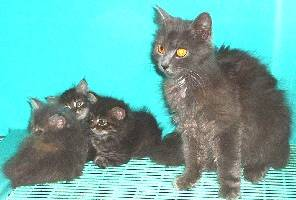

In [53]:
im = Image.open(path)
im

In [54]:
print('im:', im)
print('\nnp.array(im):\n',np.array(im))
print('\nnp.array(im).shape:', np.array(im).shape)

im: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=296x200 at 0x21A62EB3438>

np.array(im):
 [[[ 72 254 255]
  [ 72 254 255]
  [ 72 254 255]
  ...
  [132 254 255]
  [132 254 255]
  [132 254 255]]

 [[ 71 253 254]
  [ 71 253 254]
  [ 71 253 254]
  ...
  [132 254 255]
  [132 254 255]
  [132 254 255]]

 [[ 70 252 253]
  [ 70 252 253]
  [ 70 252 253]
  ...
  [132 254 255]
  [132 254 255]
  [132 254 255]]

 ...

 [[104 225 218]
  [112 233 226]
  [118 238 229]
  ...
  [  0  79  74]
  [  0  75  71]
  [  0  74  70]]

 [[103 230 223]
  [115 240 232]
  [124 244 235]
  ...
  [162 241 238]
  [166 242 238]
  [171 246 242]]

 [[106 237 229]
  [122 249 240]
  [132 251 245]
  ...
  [174 253 250]
  [181 255 253]
  [187 255 255]]]

np.array(im).shape: (200, 296, 3)


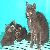

In [55]:
im = im.resize((50, 50))
im

In [56]:
im = np.array(im)
print('im\n', im, '\n\nim.shape', im.shape)

im
 [[[ 70 252 253]
  [ 71 253 254]
  [ 74 255 255]
  ...
  [162 255 255]
  [133 252 255]
  [132 254 255]]

 [[ 72 254 255]
  [ 71 253 254]
  [ 74 255 255]
  ...
  [157 255 253]
  [132 254 255]
  [131 255 255]]

 [[ 72 254 255]
  [ 73 255 255]
  [ 73 255 255]
  ...
  [156 255 253]
  [131 255 255]
  [127 255 254]]

 ...

 [[ 90 221 203]
  [ 97 212 209]
  [125 203 187]
  ...
  [153 234 228]
  [163 242 239]
  [176 255 251]]

 [[ 89 209 199]
  [ 71 171 163]
  [166 243 233]
  ...
  [173 250 240]
  [ 91 177 168]
  [ 24 103  98]]

 [[124 244 235]
  [191 246 249]
  [148 227 221]
  ...
  [195 255 255]
  [180 255 255]
  [162 241 238]]] 

im.shape (50, 50, 3)


## one hot encoding

In [57]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [63]:
np.eye(3)[[1, 2]]

array([[0., 1., 0.],
       [0., 0., 1.]])

In [66]:
a = np.array([
    [2],
    [0],
    [1],
    [0],
    [2]
])

In [67]:
np.eye(3)[a]

array([[[0., 0., 1.]],

       [[1., 0., 0.]],

       [[0., 1., 0.]],

       [[1., 0., 0.]],

       [[0., 0., 1.]]])

In [71]:
np.unique(a, axis=0)  # 중복 제거하고 값 몇 개인지.

array([[0],
       [1],
       [2]])

In [73]:
num = np.unique(a, axis=0)
num.shape

(3, 1)

In [74]:
num.shape[0]

3

In [76]:
np.eye(num.shape[0])[a]  # 종류만큼 자동 one hot encoding

array([[[0., 0., 1.]],

       [[1., 0., 0.]],

       [[0., 1., 0.]],

       [[1., 0., 0.]],

       [[0., 0., 1.]]])

# Cats vs Dogs

In [82]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from random import shuffle
from tqdm import tqdm
import glob
from PIL import Image

tf.enable_eager_execution()
print(tf.__version__)
print(keras.__version__)

1.13.1
2.2.4-tf


In [110]:
TRAIN_DIR = './cats_dogs/train/'
TEST_DIR = './cats_dogs/test/'

LR = 0.001

IM_WIDTH = 50
IM_HEIGHT = 50

In [87]:
def read_images(directory, resize_to=(50,50)):
    images = []
    labels = []
    
    for f in tqdm(os.listdir(directory)):         #tqdm: progress bar 표시
        
        #디렉토리 이름과 파일 이름을 연결.
        #directory: ./cats_dogs/train/
        #f: cat.0.jpg
        #path: ./cats_dogs/train/cat.0.jpg
        path = os.path.join(directory, f)
        
        im = Image.open(path)
        im = im.resize(resize_to)
        
        im = np.array(im) / 255.0   # 이미지 파일에 저장된 RGB 값은 0~255 사이로 저장되어 있음.ㅁ
        im = im.astype('float32')
        
        images.append(im)  # images에 im 추가
        
        label = 1 if 'dog' in f.lower() else 0  # 파일 이름 소문자 변환(f.lower) 후 dog->1
        labels.append(label)
        
    #label을 one hot encoding 처리
    num = np.unique(labels, axis=0)
    num = num.shape[0]
    labels = np.eye(num)[labels]
    
    return np.array(images), np.array(labels)

In [88]:
X_train, y_train = read_images(directory = TRAIN_DIR, resize_to=(IM_WIDTH, IM_HEIGHT))

100%|█████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:09<00:00, 439.60it/s]


In [89]:
X_train.shape

(4000, 50, 50, 3)

In [90]:
y_train.shape

(4000, 2)

In [111]:
X_test,y_test = read_images(directory=TEST_DIR, resize_to=(IM_WIDTH, IM_HEIGHT))
X_test.shape

100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 675.92it/s]


(300, 50, 50, 3)

In [112]:
y_test.shape   # test는 X, y 안 나눠도 되지만, 함수 그대로 쓰려고 (배열에 넣는 함수)

(300, 1)

In [94]:
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(filters=32, kernel_size=5, activation=tf.nn.relu, padding='SAME',
                                  input_shape=(50, 50, 3)))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=64, kernel_size=5, activation=tf.nn.relu, padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=128, kernel_size=5, activation=tf.nn.relu, padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=64, kernel_size=5, activation=tf.nn.relu, padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=32, kernel_size=5, activation=tf.nn.relu, padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(1024, activation=tf.nn.relu))
    model.add(keras.layers.Dropout(0.8))
    model.add(keras.layers.Dense(2))
    return model

In [96]:
model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 50, 50, 32)        2432      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 25, 25, 64)        51264     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 128)       204928    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 64)          204864    
__________

In [98]:
optimizer = tf.train.AdamOptimizer(0.001)

batch_size = 100

total_batch = int(len(X_train)/batch_size)
total_batch

40

In [99]:
def random_batch(arr_x, arr_y):
    num_images = len(arr_x)
    idx = np.random.choice(num_images, size=batch_size, replace=False) # 난수 (replace=False: 중복X
    x_batch = arr_x[idx]
    y_batch = arr_y[idx]
    
    return x_batch, y_batch

In [101]:
for step in range(30):
    total_cost = 0
    total_accuracy = 0
    
    for i in range(total_batch):
        X, Y = random_batch(X_train, y_train)
        
        with tf.GradientTape() as tape:
            hypothesis = model(X, training=True)
            cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hypothesis,
                                                                             labels=Y))
            grads = tape.gradient(cost, model.variables)
            
        optimizer.apply_gradients(zip(grads, model.variables))
        total_cost += cost
        correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        total_accuracy += accuracy
        
    print('step: {} Loss: {:.4f} accuracy: {:.4f}'.format(step, total_cost/total_batch,
                                                          total_accuracy/total_batch))

step: 0 Loss: 0.6931 accuracy: 0.5220
step: 1 Loss: 0.6924 accuracy: 0.5090
step: 2 Loss: 0.6836 accuracy: 0.5392
step: 3 Loss: 0.6749 accuracy: 0.5575
step: 4 Loss: 0.6613 accuracy: 0.6090
step: 5 Loss: 0.6129 accuracy: 0.6552
step: 6 Loss: 0.6031 accuracy: 0.6750
step: 7 Loss: 0.5780 accuracy: 0.7028
step: 8 Loss: 0.5509 accuracy: 0.7278
step: 9 Loss: 0.5058 accuracy: 0.7520
step: 10 Loss: 0.4843 accuracy: 0.7682
step: 11 Loss: 0.4472 accuracy: 0.7958
step: 12 Loss: 0.3743 accuracy: 0.8310
step: 13 Loss: 0.3037 accuracy: 0.8735
step: 14 Loss: 0.2376 accuracy: 0.9075
step: 15 Loss: 0.2190 accuracy: 0.9202
step: 16 Loss: 0.1514 accuracy: 0.9427
step: 17 Loss: 0.1286 accuracy: 0.9527
step: 18 Loss: 0.1081 accuracy: 0.9595
step: 19 Loss: 0.0628 accuracy: 0.9812
step: 20 Loss: 0.0790 accuracy: 0.9687
step: 21 Loss: 0.0678 accuracy: 0.9785
step: 22 Loss: 0.0626 accuracy: 0.9782
step: 23 Loss: 0.0713 accuracy: 0.9747
step: 24 Loss: 0.0455 accuracy: 0.9823
step: 25 Loss: 0.0199 accuracy: 0.9

In [113]:
# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

NameError: name 'ModelCheckpoint' is not defined

- load weights:
### model.load_weights("weights.best.hdf5")

In [114]:
predict = model(X_test, training=False)
predict # 이미지가 0~1 각각에 해당하는 확률이 저장되어 있음

<tf.Tensor: id=261724, shape=(300, 2), dtype=float32, numpy=
array([[-8.5439444e-01,  7.5288922e-01],
       [-8.7895006e-01,  8.2188219e-01],
       [ 4.8322215e+00, -4.8999019e+00],
       [ 8.4220362e+00, -8.5394554e+00],
       [-4.8418326e+00,  4.5307579e+00],
       [ 3.6028593e+00, -3.6757088e+00],
       [ 2.4977291e+00, -2.6084731e+00],
       [-2.7935498e+00,  2.6135435e+00],
       [-4.0441217e+00,  3.7893379e+00],
       [-3.1500572e-01,  2.3002146e-01],
       [ 1.1045837e+00, -1.1504219e+00],
       [ 3.0280886e+00, -3.1148844e+00],
       [ 1.2528044e+01, -1.2875568e+01],
       [-5.8232255e+00,  5.4500904e+00],
       [ 1.2092422e+00, -1.2382461e+00],
       [ 5.4525142e+00, -5.5997667e+00],
       [ 2.5481422e+00, -2.5768306e+00],
       [ 3.0709181e+00, -3.1360848e+00],
       [-1.9903861e+00,  1.8385662e+00],
       [ 2.0259583e+00, -2.1233072e+00],
       [ 3.8954127e+00, -4.0795236e+00],
       [-3.0761812e+00,  2.8884778e+00],
       [-2.3638344e+00,  2.1829891e+0

In [115]:
predict=tf.argmax(predict, 1)  # 가장 확률 높은 col의 index를 predict에 저장
predict

<tf.Tensor: id=261727, shape=(300,), dtype=int64, numpy=
array([1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 

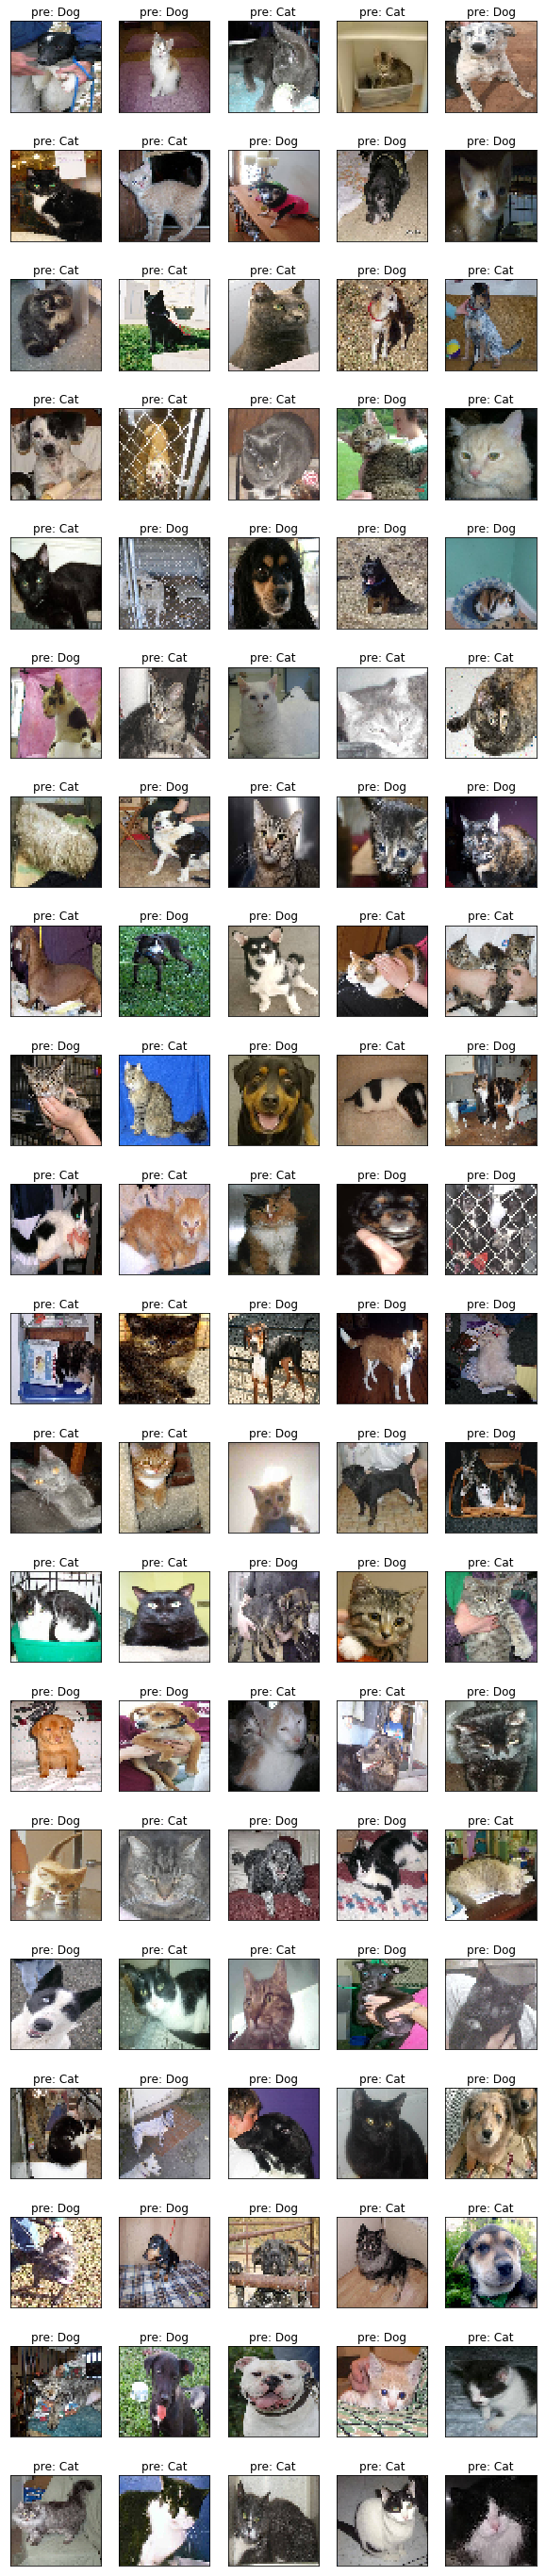

In [123]:
fig = plt.figure(figsize=(10, 50))
for i in range(100):
    subplot = fig.add_subplot(20, 5, i + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    model_out = predict[i].numpy()
    
    if model_out == 1:
        str_label = 'Dog'
    else:
        str_label = 'Cat'
    subplot.set_title('pre: %s' %str_label)
    subplot.imshow(X_test[i].reshape(50, 50, 3))
    
plt.show()

In [183]:
def read_images(directory, resize_to=(50,50)):
    images = []
    
    for f in tqdm(os.listdir(directory)):         #tqdm: progress bar 표시
        
        #디렉토리 이름과 파일 이름을 연결.
        #directory: ./cats_dogs/train/
        #f: cat.0.jpg
        #path: ./cats_dogs/train/cat.0.jpg
        path = os.path.join(directory, f)
        
        im = Image.open(path)
        im = im.resize(resize_to)
        
        im = np.array(im) / 255.0   # 이미지 파일에 저장된 RGB 값은 0~255 사이로 저장되어 있음.ㅁ
        im = im.astype('float32')
        
        images.append(im)  # images에 im 추가
    
    return np.array(images)

In [184]:
images = read_images(directory='C:\jupyter_project\data\etc')
images

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 47.38it/s]


array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[0.24313726, 0.24313726, 0.2509804 ],
         [0.24705882, 0.2509804 , 0.27058825]

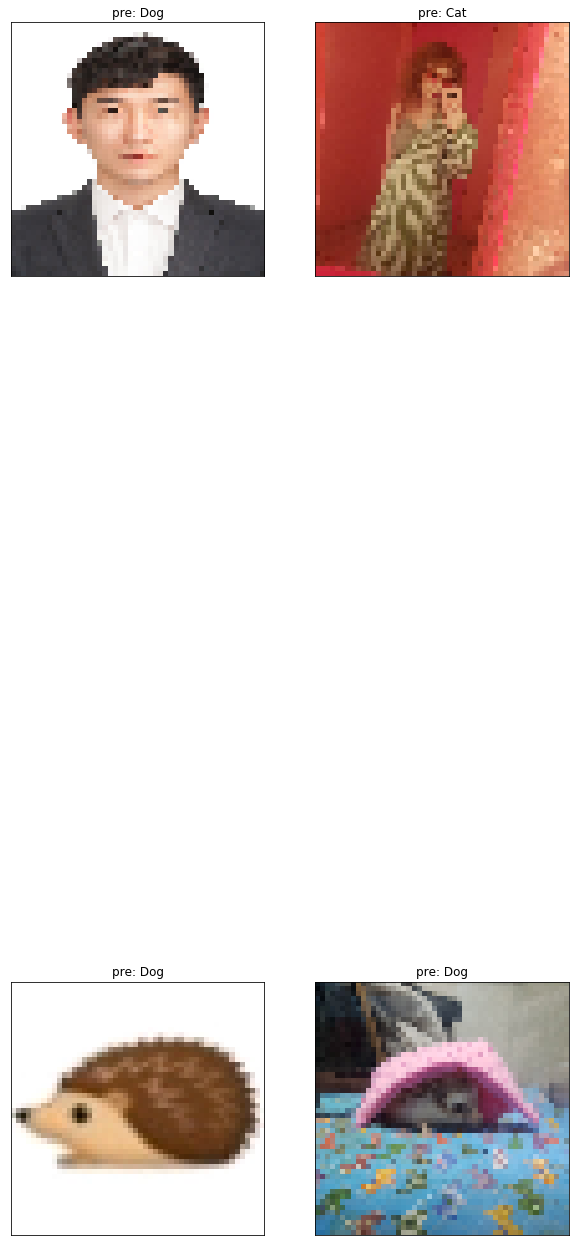

In [185]:
predict = model(images, training=False)
predict=tf.argmax(predict, 1)  # 가장 확률 높은 col의 index를 predict에 저장

fig = plt.figure(figsize=(10, 50))
for i in range(4):
    subplot = fig.add_subplot(3, 2, i + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    model_out = predict[i].numpy()
    
    if model_out == 1:
        str_label = 'Dog'
    else:
        str_label = 'Cat'
    subplot.set_title('pre: %s' %str_label)
    subplot.imshow(images[i].reshape(50, 50, 3))
    
plt.show()